In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [2]:
model_name = 'nominal'
modelDir = '/net/data_cms/institut_3a/hschoenen/models/{}'.format(model_name)
saveDir = '/home/home1/institut_3a/hschoenen/plots'

def get_array(quantity,attack='nominal'):
    array = np.load('{}/variables/{}/{}.npy'.format(modelDir,attack,quantity))
    return array

# epsilons for adversarial attacks
global_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_standardized_epsilons.npy')
cpf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_standardized_epsilons.npy')
npf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_standardized_epsilons.npy')
vtx_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_standardized_epsilons.npy')
input_deltas = {
    'glob': global_deltas,
    'cpf': cpf_deltas,
    'npf': npf_deltas,
    'vtx': vtx_deltas,
}

# get truth flavor information
isB = get_array('isB')
isBB = get_array('isBB')
isLeptonicB = get_array('isLeptonicB')
isC = get_array('isC')
isUDS = get_array('isUDS')
isG = get_array('isG')
# print number of jets in each category
flavours = [isB,isBB,isLeptonicB,isC,isUDS,isG]
flavour_names = ['isB','isBB','isLeptonicB','isC','isUDS','isG']
sum = 0
for i in range(len(flavours)):
    print('{}: {:n}'.format(flavour_names[i], np.sum(flavours[i])))
    sum += np.sum(flavours[i])
print('total: {:n}'.format(sum))
# summarize jet flavors
B = isB + isBB + isLeptonicB
C = isC
L = isUDS + isG

isB: 28340
isBB: 211
isLeptonicB: 4418
isC: 19899
isUDS: 47762
isG: 28369
total: 128999


In [5]:
# calculate Kullack-Leibler divergence
def kldiv(A, B):
        return np.sum([v for v in A * np.log(A/B) if not np.isnan(v)])

# calculate Jensen-Shannon divergence
def jsdiv(P, Q, normalize_first=False):
    P = np.array(P)
    Q = np.array(Q)
    if normalize_first:
        P = P/P.sum()
        Q = Q/Q.sum()
    M = 0.5 * (P + Q)
    return 0.5 * (kldiv(P, M) +kldiv(Q, M))

attack_labels = {
    'nominal': 'nominal',
    'fgsm-0_01': r'fgsm $\epsilon=0.01$',
    'fgsm-0_05': r'fgsm $\epsilon=0.05$',
    'fgsm-0_1': r'FGSM $\epsilon=0.1$',
    'gaussian-0_1': r'gaussian $\epsilon=0.1$',
    'gaussian-5': r'gaussian $\epsilon=5$',
}
attack_colors = {
    'nominal': 'tab:blue',
    'fgsm-0_01': 'tab:orange',
    'fgsm-0_05': 'tab:orange',
    'fgsm-0_1': 'tab:orange',
    'gaussian-0_1': 'tab:green',
    'gaussian-5': 'tab:green',
}
    
quantity_labels = {
    # global
    'jet_pt': '$p_{T}[GeV]$', 
    'jet_eta': '$\eta$',
    'nCpfcand': '$N_{CPF}$',
    'nNpfcand': '$N_{NPF}$',
    'nsv': '$N_{SV}$',
    'npv': '$N_{PV}$',
    'TagVarCSV_trackSumJetEtRatio': 'TagVarCSV_trackSumJetEtRatio',
    'TagVarCSV_trackSumJetDeltaR': 'TagVarCSV_trackSumJetDeltaR',
    'TagVarCSV_vertexCategory': 'TagVarCSV_vertexCategory',
    'TagVarCSV_trackSip2dValAboveCharm': 'TagVarCSV_trackSip2dValAboveCharm',
    'TagVarCSV_trackSip2dSigAboveCharm': 'TagVarCSV_trackSip2dSigAboveCharm',
    'TagVarCSV_trackSip3dValAboveCharm': 'TagVarCSV_trackSip3dValAboveCharm',
    'TagVarCSV_trackSip3dSigAboveCharm': 'TagVarCSV_trackSip3dSigAboveCharm',
    'TagVarCSV_jetNSelectedTracks': 'TagVarCSV_jetNSelectedTracks',
    'TagVarCSV_jetNTracksEtaRel': 'TagVarCSV_jetNTracksEtaRel',
    # cpf
    'Cpfcan_BtagPf_trackEtaRel': 'Cpfcan_BtagPf_trackEtaRel',
    'Cpfcan_BtagPf_trackPtRel': 'Cpfcan_BtagPf_trackPtRel',
    'Cpfcan_BtagPf_trackPPar': 'Cpfcan_BtagPf_trackPPar',
    'Cpfcan_BtagPf_trackDeltaR': 'Cpfcan_BtagPf_trackDeltaR',
    'Cpfcan_BtagPf_trackPParRatio': 'Cpfcan_BtagPf_trackPParRatio',
    'Cpfcan_BtagPf_trackSip2dVal': 'Cpfcan_BtagPf_trackSip2dVal',
    'Cpfcan_BtagPf_trackSip2dSig': 'Cpfcan_BtagPf_trackSip2dSig',
    'Cpfcan_BtagPf_trackSip3dVal': '3D SIP [cm] (1st CPF candidate)',
    'Cpfcan_BtagPf_trackSip3dSig': 'Cpfcan_BtagPf_trackSip3dSig',
    'Cpfcan_BtagPf_trackJetDistVal': 'Cpfcan_BtagPf_trackJetDistVal',
    'Cpfcan_ptrel': 'Cpfcan_ptrel',
    'Cpfcan_drminsv': 'Cpfcan_drminsv',
    'Cpfcan_VTX_ass': 'Cpfcan_VTX_ass',
    'Cpfcan_puppiw': 'Cpfcan_puppiw',
    'Cpfcan_chi2': 'Cpfcan_chi2',
    'Cpfcan_quality': 'Cpfcan_quality',
    # npf
    'Npfcan_ptrel': 'Npfcan_ptrel', 
    'Npfcan_deltaR': 'Npfcan_deltaR',
    'Npfcan_isGamma': 'Npfcan_isGamma', 
    'Npfcan_HadFrac': 'Npfcan_HadFrac', 
    'Npfcan_drminsv': 'Npfcan_drminsv', 
    'Npfcan_puppiw': 'Npfcan_puppiw',
    # vtx
    'sv_pt': 'sv_pt',
    'sv_deltaR': 'sv_deltaR',
    'sv_mass': 'sv_mass',
    'sv_ntracks': 'sv_ntracks',
    'sv_chi2': 'sv_chi2',
    'sv_normchi2': 'sv_normchi2',
    'sv_dxy': 'sv_dxy',
    'sv_dxysig': 'sv_dxysig',
    'sv_d3d': '3D flight distance [cm] (1st SV candidate)',
    'sv_d3dsig': 'sv_d3dsig',
    'sv_costhetasvpv': 'sv_costhetasvpv',
    'sv_enratio': 'sv_enratio',
    # labels
    'isB': 0,
    'isBB': 0, 
    'isLeptonicB': 0, 
    'isC': 0, 
    'isUDS': 0, 
    'isG': 0,
    # outputs
    'prob_isB': 'P(b)',
    'prob_isBB': 'P(bb)', 
    'prob_isLeptonicB': 'P(lep b)', 
    'prob_isC': 'P(c)', 
    'prob_isUDS': 'P(uds)',
    'prob_isG': 'P(g)',
}

quantity_indices = {
    # global
    'jet_pt': ['glob',0], 
    'jet_eta': ['glob',1],
    'nCpfcand': ['glob',2],
    'nNpfcand': ['glob',3],
    'nsv': ['glob',4],
    'npv': ['glob',5],
    'TagVarCSV_trackSumJetEtRatio': ['glob',6],
    'TagVarCSV_trackSumJetDeltaR': ['glob',7],
    'TagVarCSV_vertexCategory': ['glob',8],
    'TagVarCSV_trackSip2dValAboveCharm': ['glob',9],
    'TagVarCSV_trackSip2dSigAboveCharm': ['glob',10],
    'TagVarCSV_trackSip3dValAboveCharm': ['glob',11],
    'TagVarCSV_trackSip3dSigAboveCharm': ['glob',12],
    'TagVarCSV_jetNSelectedTracks': ['glob',13],
    'TagVarCSV_jetNTracksEtaRel': ['glob',14],
    # cpf
    'Cpfcan_BtagPf_trackEtaRel': ['cpf',0,0],
    'Cpfcan_BtagPf_trackPtRel': ['cpf',0,1],
    'Cpfcan_BtagPf_trackPPar': ['cpf',0,2],
    'Cpfcan_BtagPf_trackDeltaR': ['cpf',0,3],
    'Cpfcan_BtagPf_trackPParRatio': ['cpf',0,4],
    'Cpfcan_BtagPf_trackSip2dVal': ['cpf',0,5],
    'Cpfcan_BtagPf_trackSip2dSig': ['cpf',0,6],
    'Cpfcan_BtagPf_trackSip3dVal': ['cpf',0,7],
    'Cpfcan_BtagPf_trackSip3dSig': ['cpf',0,8],
    'Cpfcan_BtagPf_trackJetDistVal': ['cpf',0,9],
    'Cpfcan_ptrel': ['cpf',0,10],
    'Cpfcan_drminsv': ['cpf',0,11],
    'Cpfcan_VTX_ass': ['cpf',0,12],
    'Cpfcan_puppiw': ['cpf',0,13],
    'Cpfcan_chi2': ['cpf',0,14],
    'Cpfcan_quality': ['cpf',0,15],
    # npf
    'Npfcan_ptrel': ['npf',0,0], 
    'Npfcan_deltaR': ['npf',0,1],
    'Npfcan_isGamma': ['npf',0,2], 
    'Npfcan_HadFrac': ['npf',0,3], 
    'Npfcan_drminsv': ['npf',0,4], 
    'Npfcan_puppiw': ['npf',0,5],
    # vtx
    'sv_pt': ['vtx',0,0],
    'sv_deltaR': ['vtx',0,1],
    'sv_mass': ['vtx',0,2],
    'sv_ntracks': ['vtx',0,3],
    'sv_chi2': ['vtx',0,4],
    'sv_normchi2': ['vtx',0,5],
    'sv_dxy': ['vtx',0,6],
    'sv_dxysig': ['vtx',0,7],
    'sv_d3d': ['vtx',0,8],
    'sv_d3dsig': ['vtx',0,9],
    'sv_costhetasvpv': ['vtx',0,10],
    'sv_enratio': ['vtx',0,11],
}

<ipython-input-5-6eae68dd5f51>:3: RuntimeWarning: invalid value encountered in true_divide
  return np.sum([v for v in A * np.log(A/B) if not np.isnan(v)])
<ipython-input-5-6eae68dd5f51>:3: RuntimeWarning: divide by zero encountered in log
  return np.sum([v for v in A * np.log(A/B) if not np.isnan(v)])
<ipython-input-5-6eae68dd5f51>:3: RuntimeWarning: invalid value encountered in multiply
  return np.sum([v for v in A * np.log(A/B) if not np.isnan(v)])


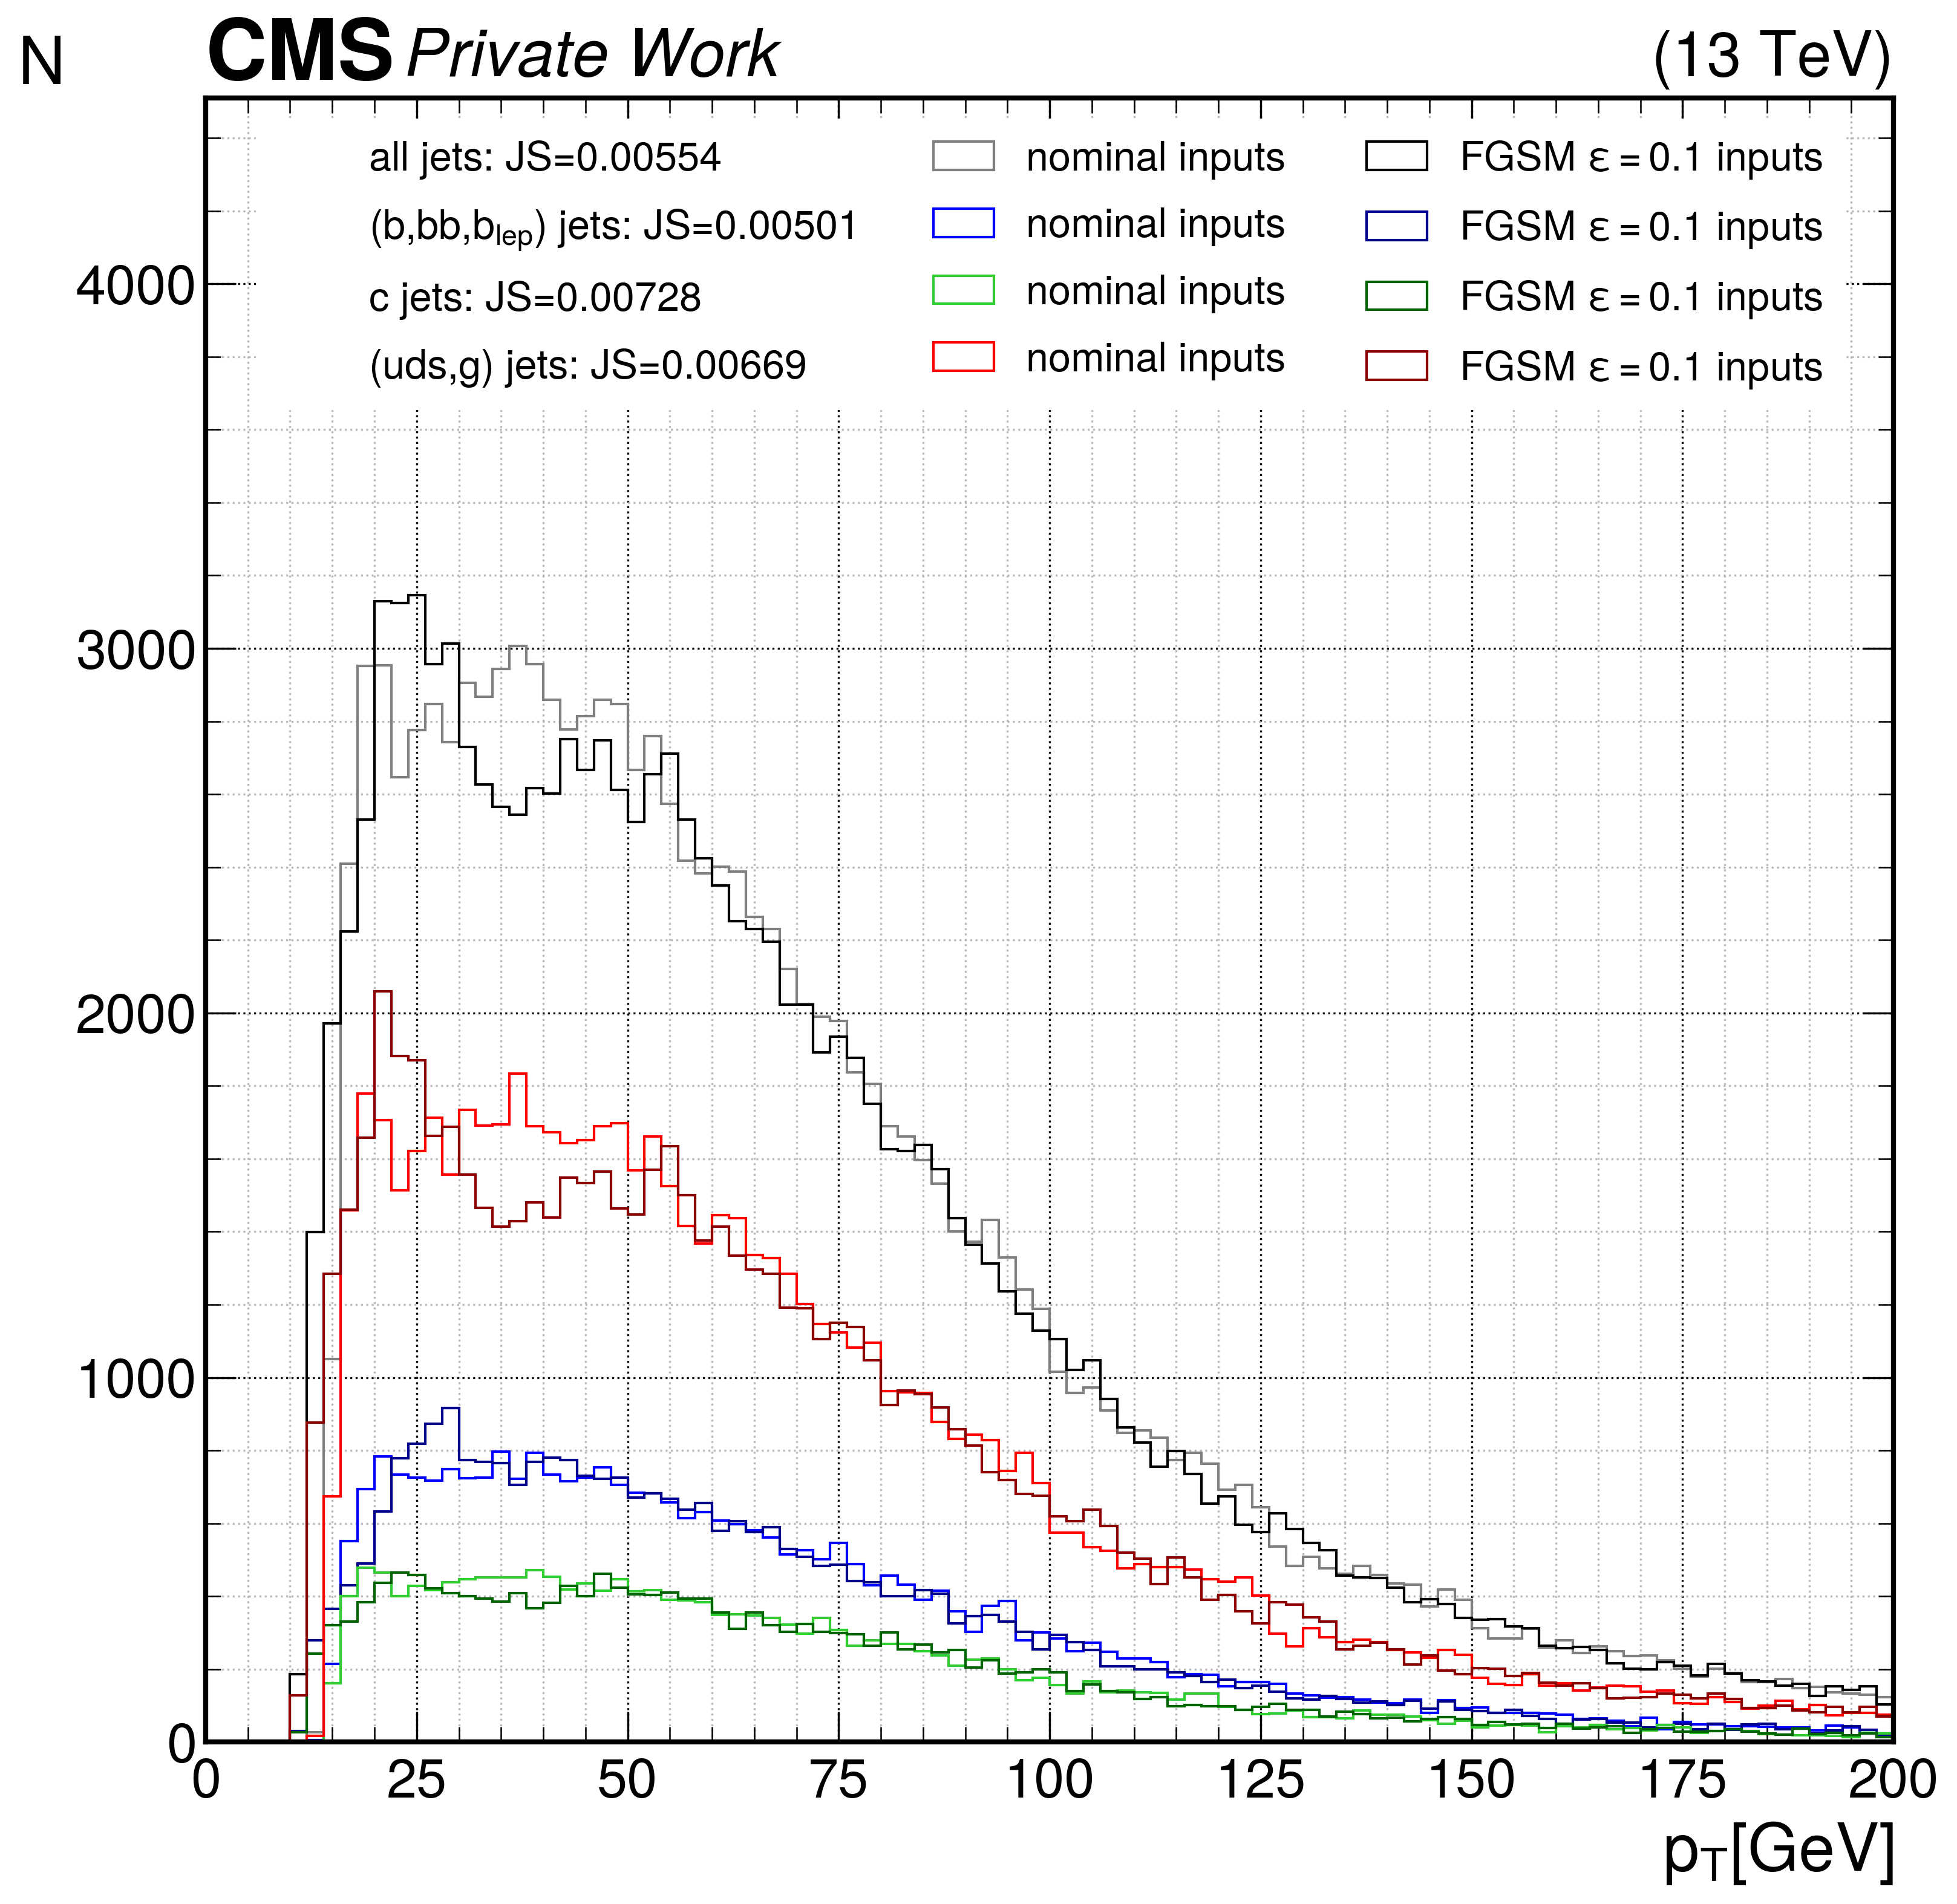

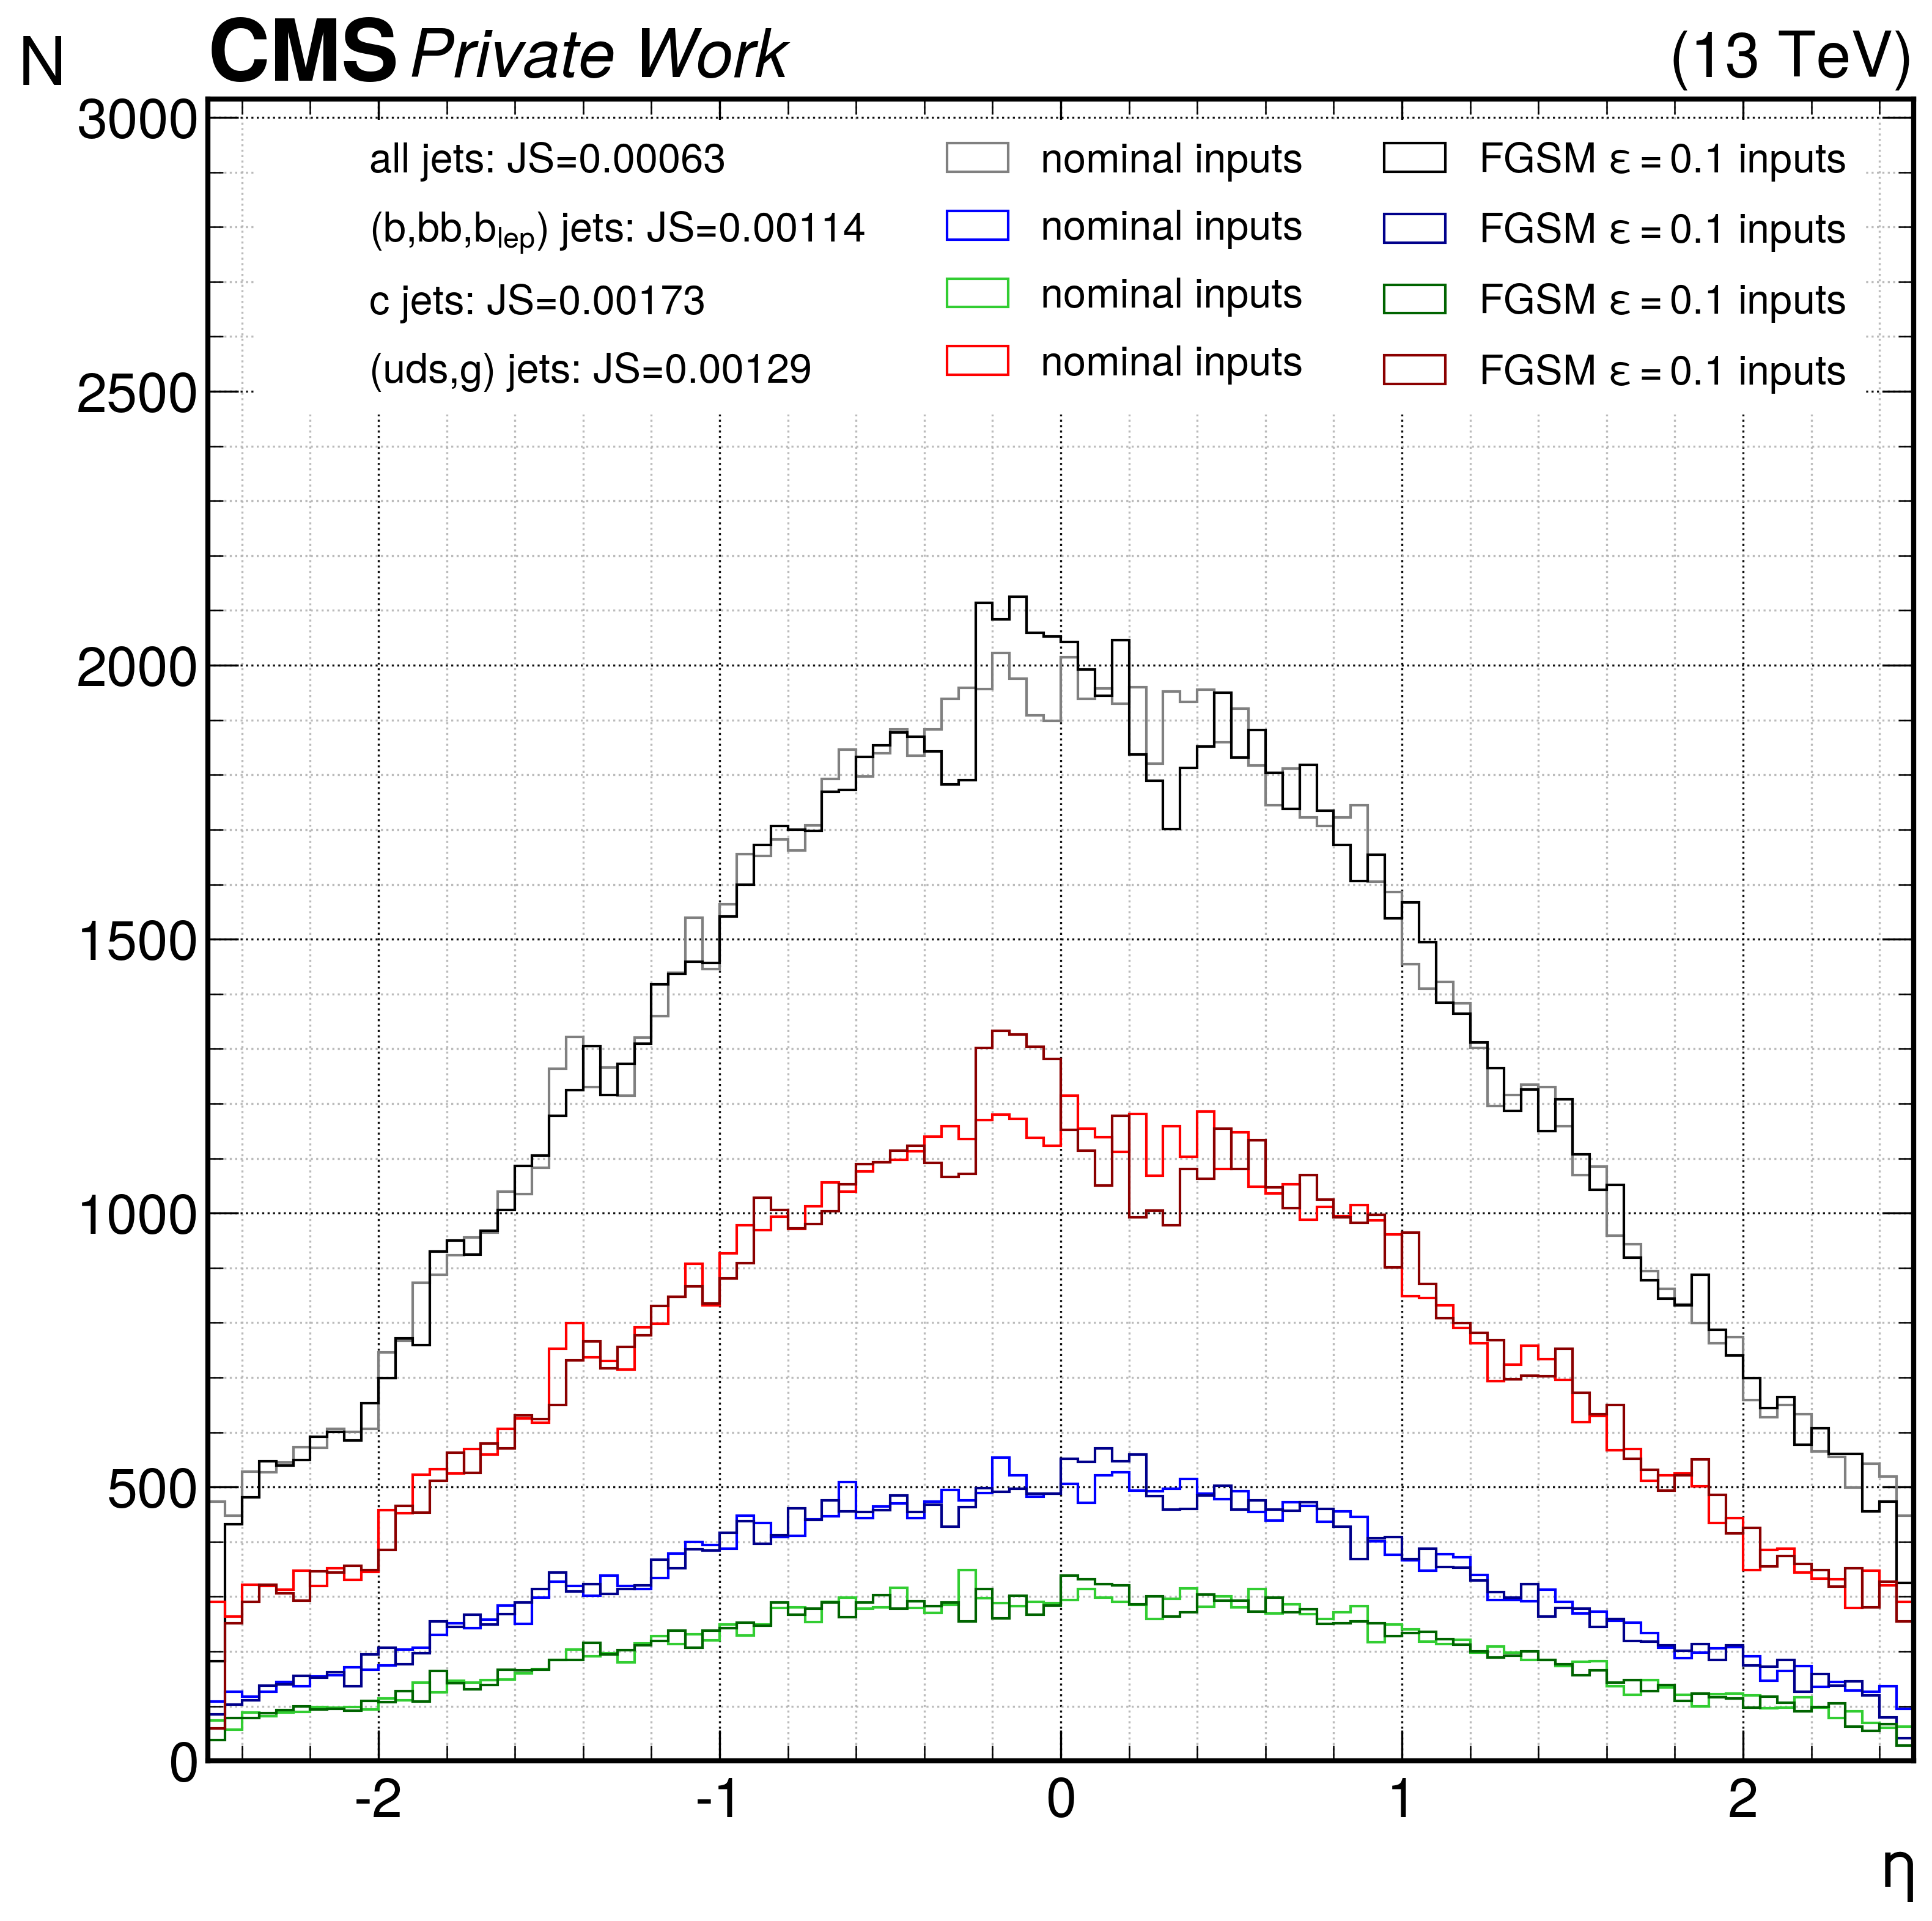

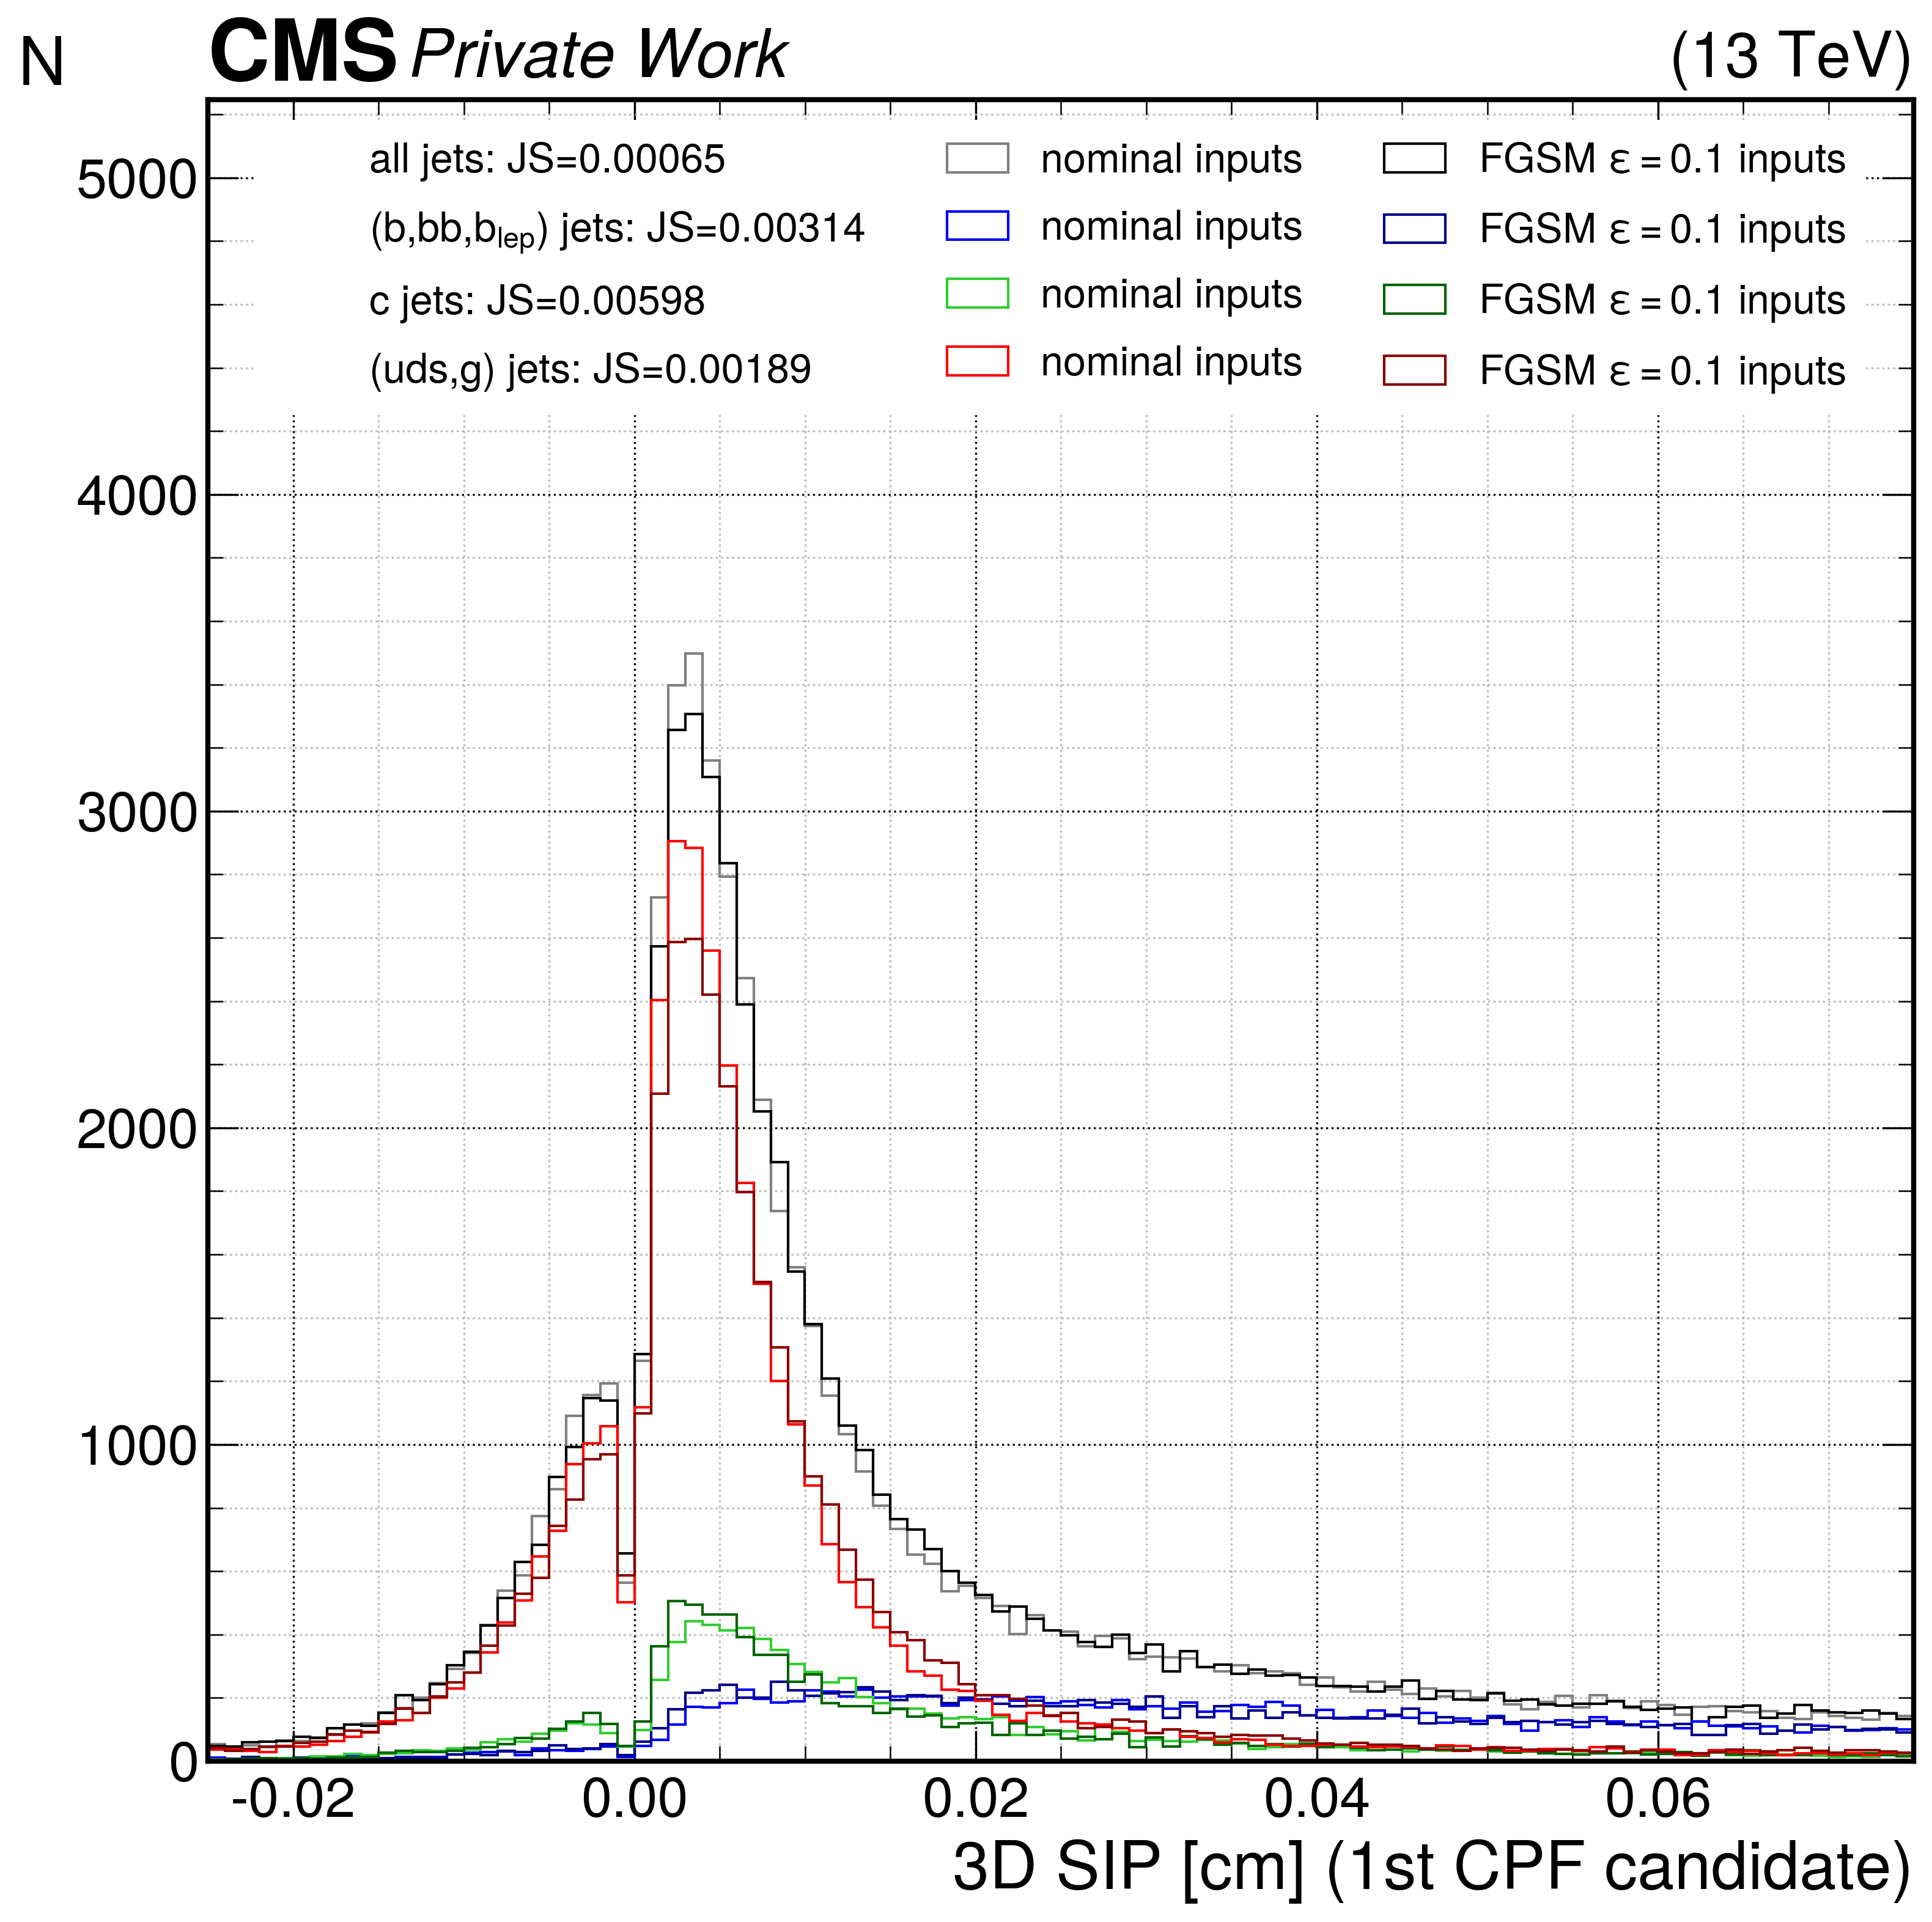

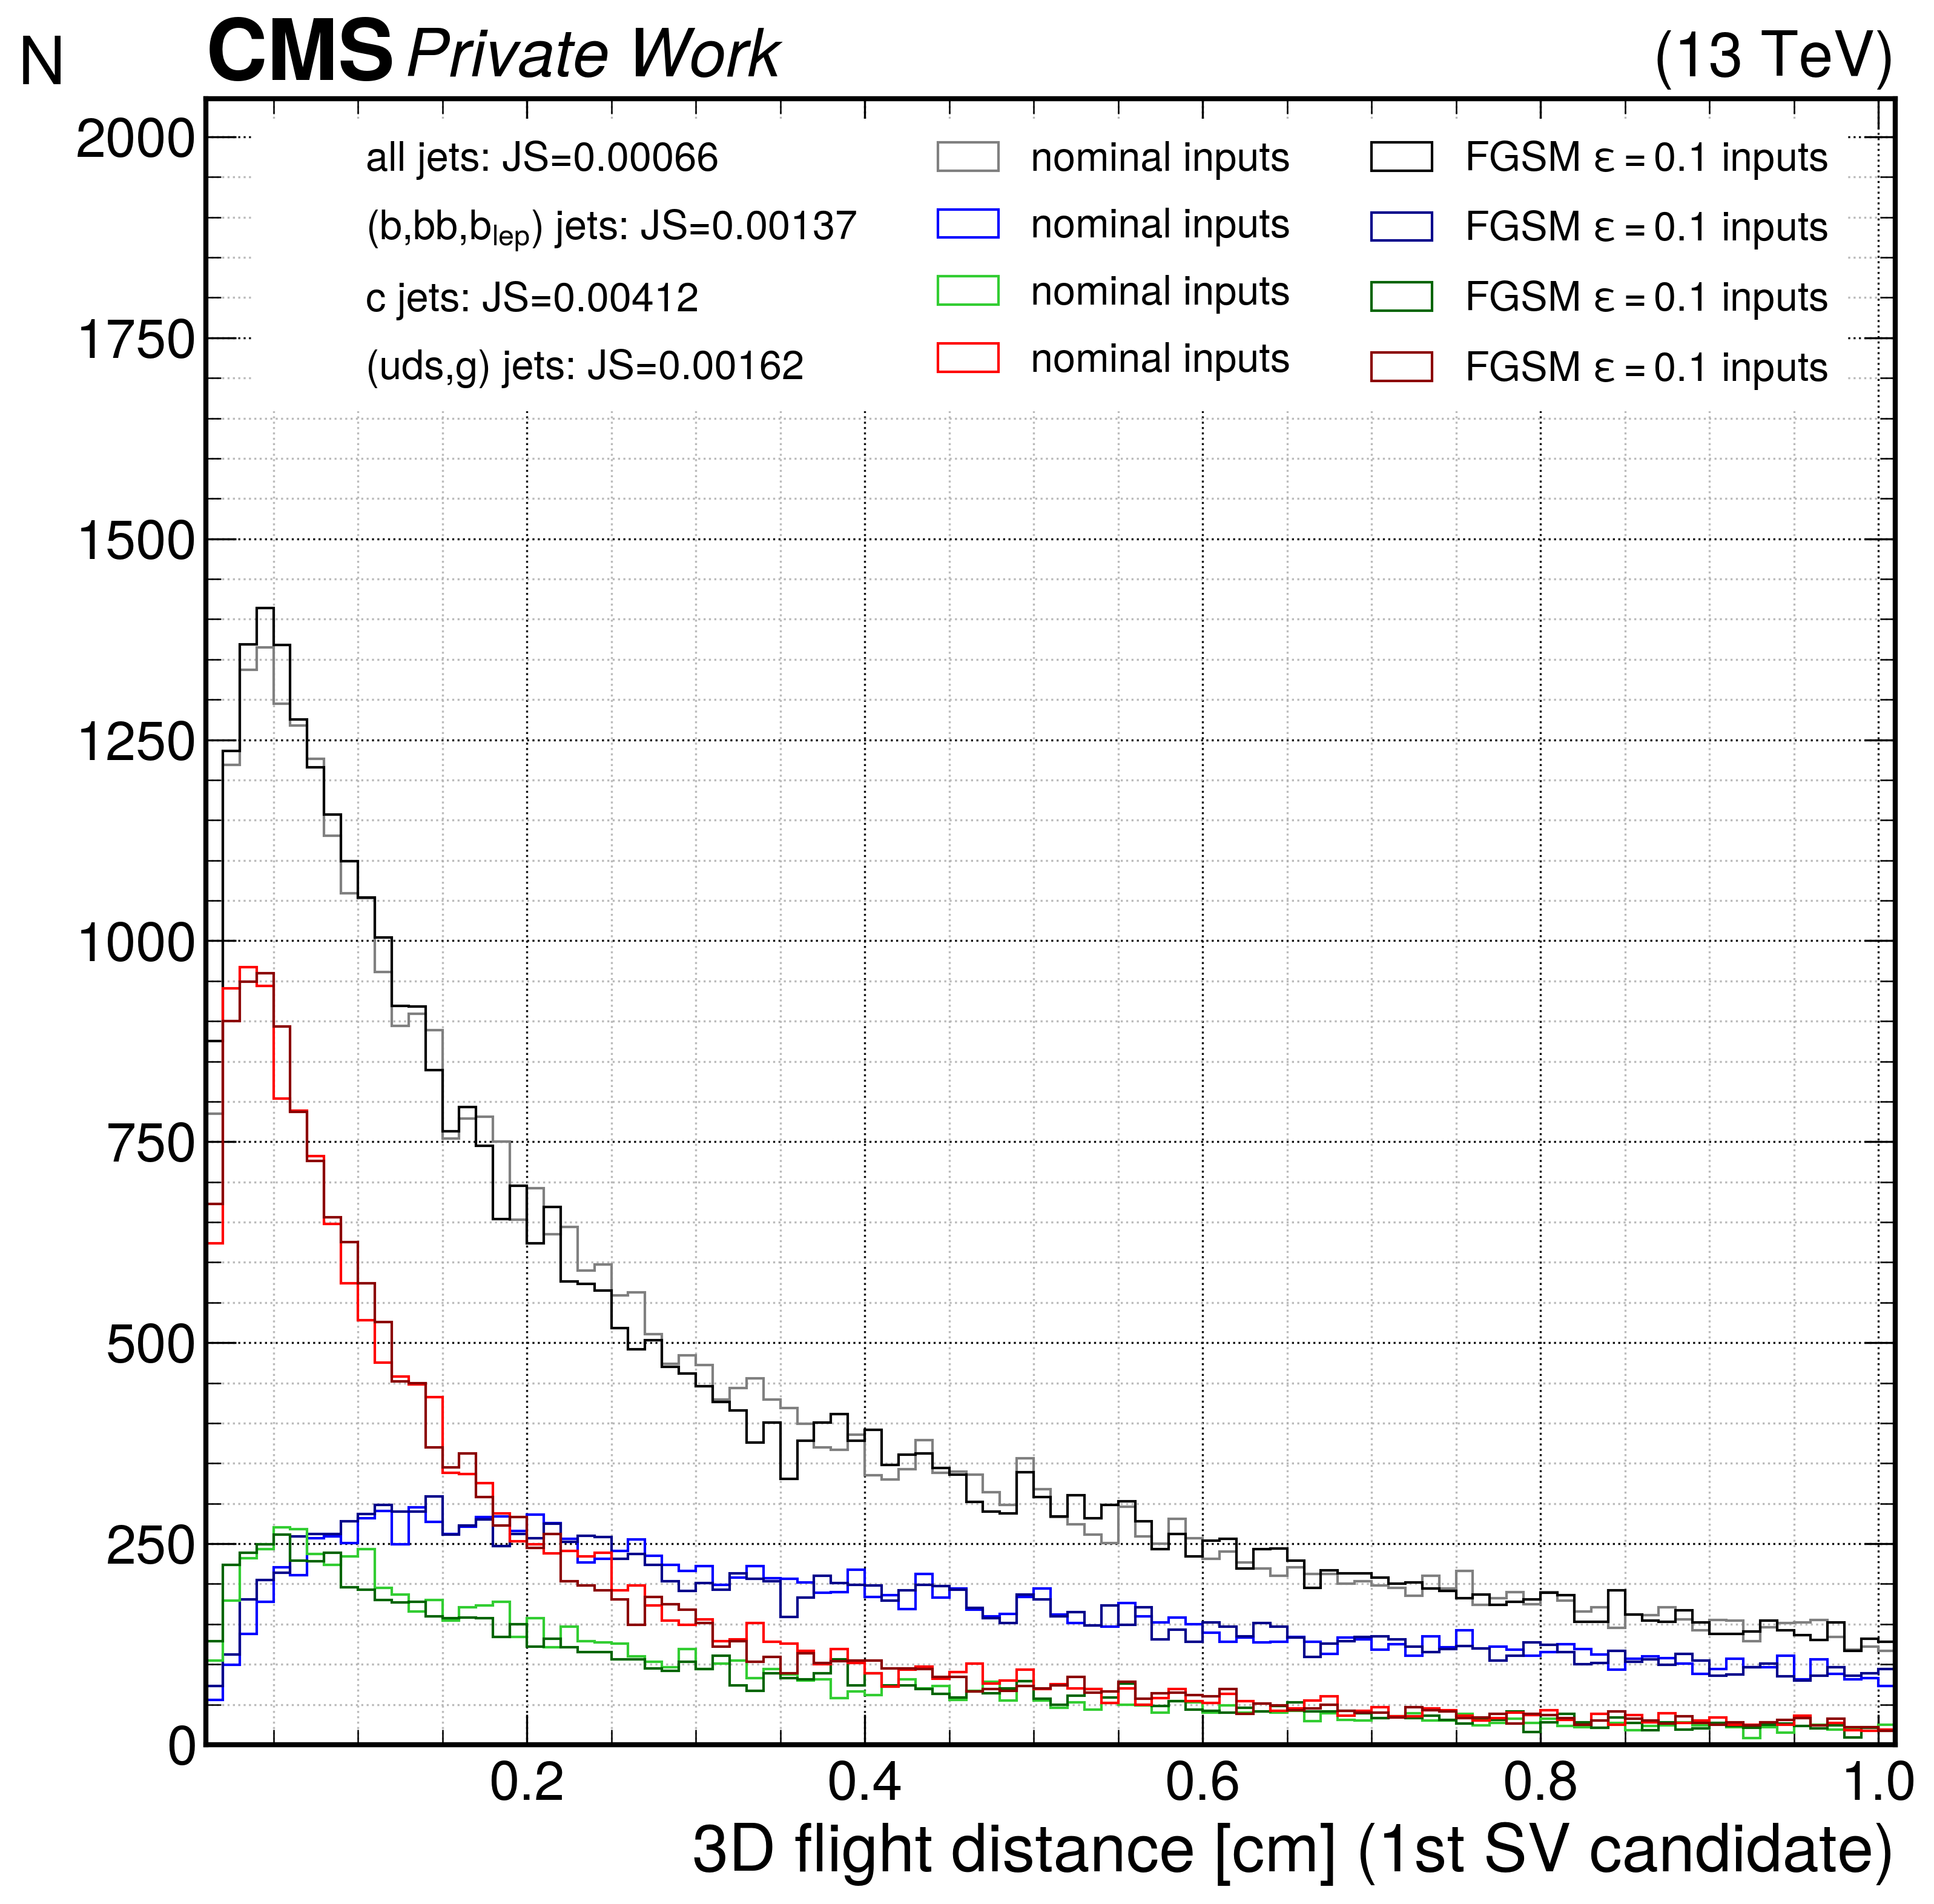

In [20]:
### Plot nominal and adversarial inputs
# list of quantities to plot
quantities = ['jet_pt','jet_eta','Cpfcan_BtagPf_trackSip3dVal','sv_d3d']
# specify attack
attack = 'fgsm-0_1'
# specify binning: [left edge, right edge, Nbins]
quantity_binnings = {
    'jet_pt': [0,200,100],
    'jet_eta': [-2.5,2.5,100],
    'Cpfcan_BtagPf_trackSip2dVal': [-0.01,0.1,110],
    'Cpfcan_BtagPf_trackSip2dSig': [-0.1,3.9,100],
    'Cpfcan_BtagPf_trackSip3dVal': [-0.025,0.075,100],
    'Cpfcan_BtagPf_trackSip3dSig': [-0.1,3.9,100],
    'sv_dxy': [0.01,1.01,100],
    'sv_dxysig': [0.01,10.01,100],
    'sv_d3d': [0.01,1.01,100],
    'sv_d3dsig': [0.01,10.01,100],
}
# specify selections
selections = ['all','b','c','udsg']
selection_labels = ['all','(b,bb,$b_{lep}$)','c','(uds,g)']
selection_indices = {
    'all':B+C+L==1,
    'b':B==1,
    'c':C==1,
    'udsg':L==1,
}
selection_colors = {
    'all': ['grey','black'],
    'b': ['blue','darkblue'],
    'c': ['limegreen','darkgreen'],
    'udsg': ['red','darkred'],
}

for quantity in quantities:
    quantity_array1 = get_array(quantity, attack='nominal')
    quantity_array2 = get_array(quantity, attack=attack)
    binning = quantity_binnings[quantity]
    # compute the JS divergence values
    js_values = np.zeros(len(selections))
    for i,selection in enumerate(selections):
        counts = np.histogram(quantity_array1[selection_indices[selection]], bins=binning[2], range=(binning[0],binning[1]))[0]
        adv_counts = np.histogram(quantity_array2[selection_indices[selection]], bins=binning[2], range=(binning[0],binning[1]))[0]
        js_values[i] = jsdiv(counts, adv_counts, normalize_first=True)
    # make figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    plt.style.use(hep.cms.style.ROOT)
    ax.set_xlim(left=binning[0], right=binning[1])
    ax.set_ylabel('N',rotation='horizontal')
    ax.set_xlabel(quantity_labels[quantity])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    # plot histograms
    ymax = 0
    for i,selection in enumerate(selections):
        ax.hist([], linewidth=0, histtype='step', label='{} jets: JS={:.5f}'.format(selection_labels[i],js_values[i]))
        entries, bins, patches = ax.hist(quantity_array1[selection_indices[selection]], bins=binning[2], range=(binning[0],binning[1]), label='nominal inputs', color=selection_colors[selection][0], histtype='step')
        ymax = np.max([ymax,np.max(entries)])
        ax.hist(quantity_array2[selection_indices[selection]], bins=binning[2], range=(binning[0],binning[1]), label='{} inputs'.format(attack_labels[attack]), color=selection_colors[selection][1], histtype='step')
    ax.set_ylim(bottom=0, top=1.5*ymax)
    legloc = 'upper center'
    handles, labels = ax.get_legend_handles_labels()
    handles_sort = handles[0::3]+handles[1::3]+handles[2::3]
    labels_sort = labels[0::3]+labels[1::3]+labels[2::3]
    leg=ax.legend(handles_sort, labels_sort, ncol=3, fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/attacks/attack_hist-{}.pdf'.format(saveDir,quantity))

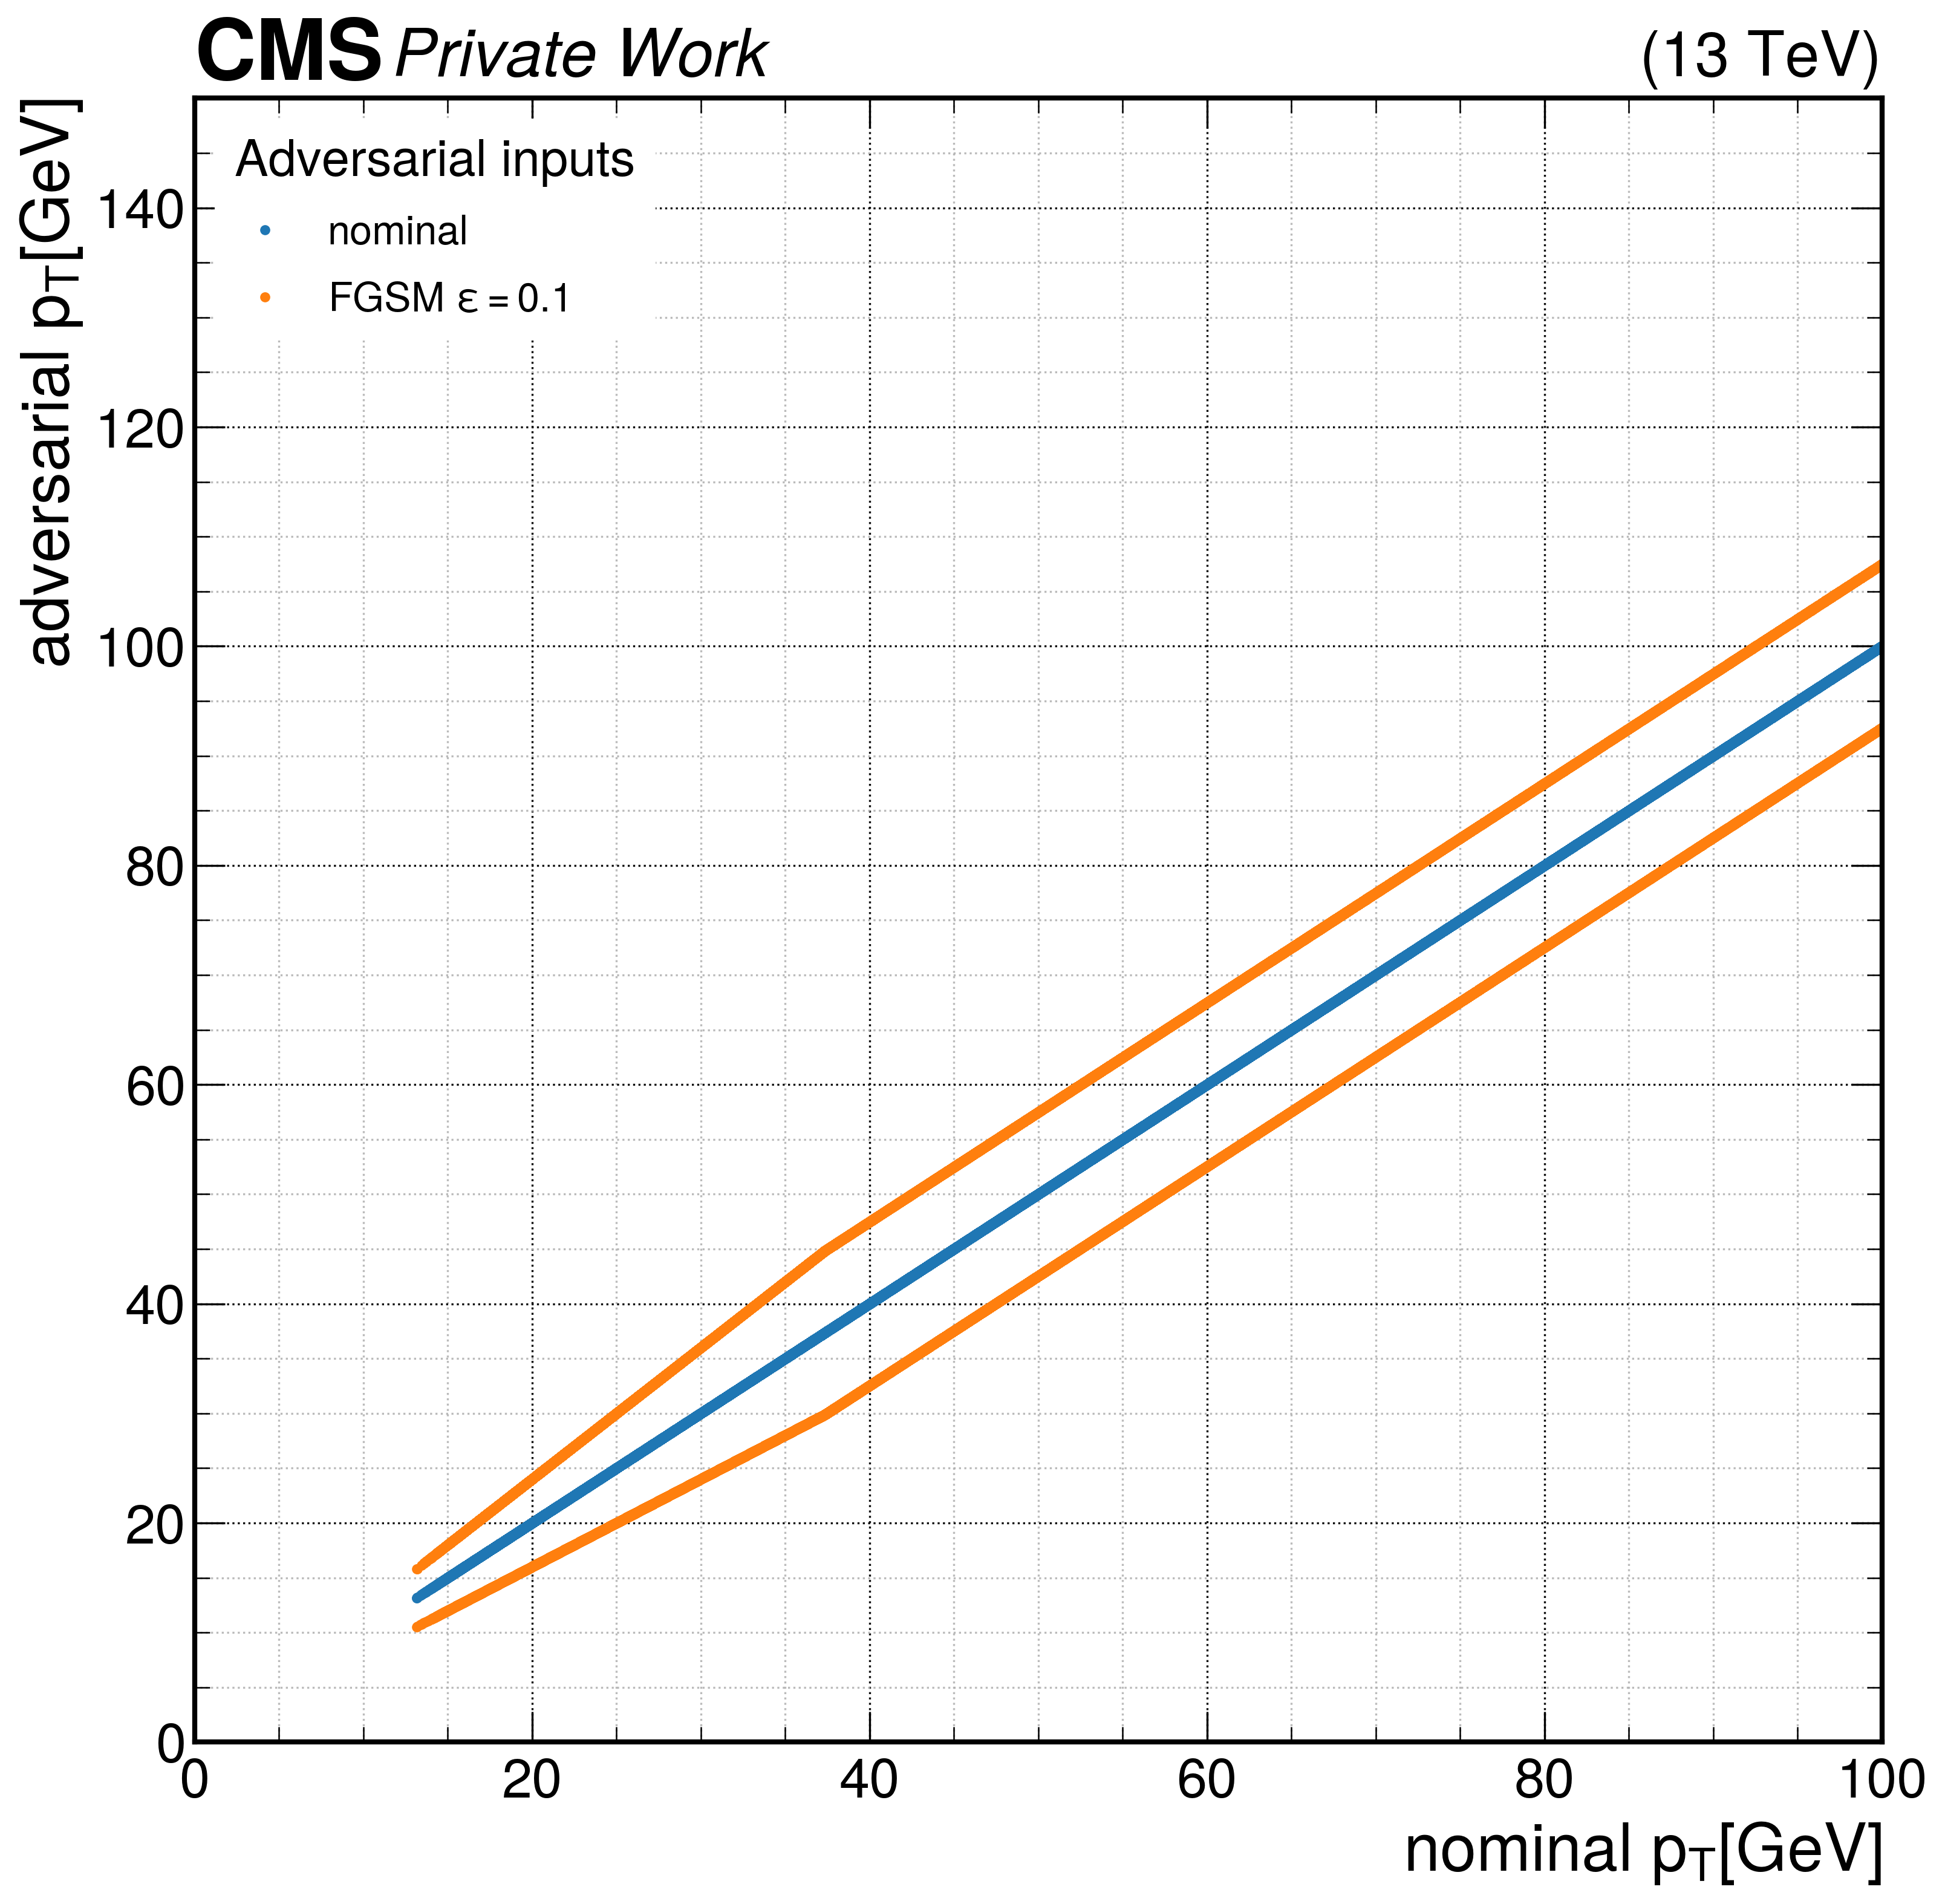

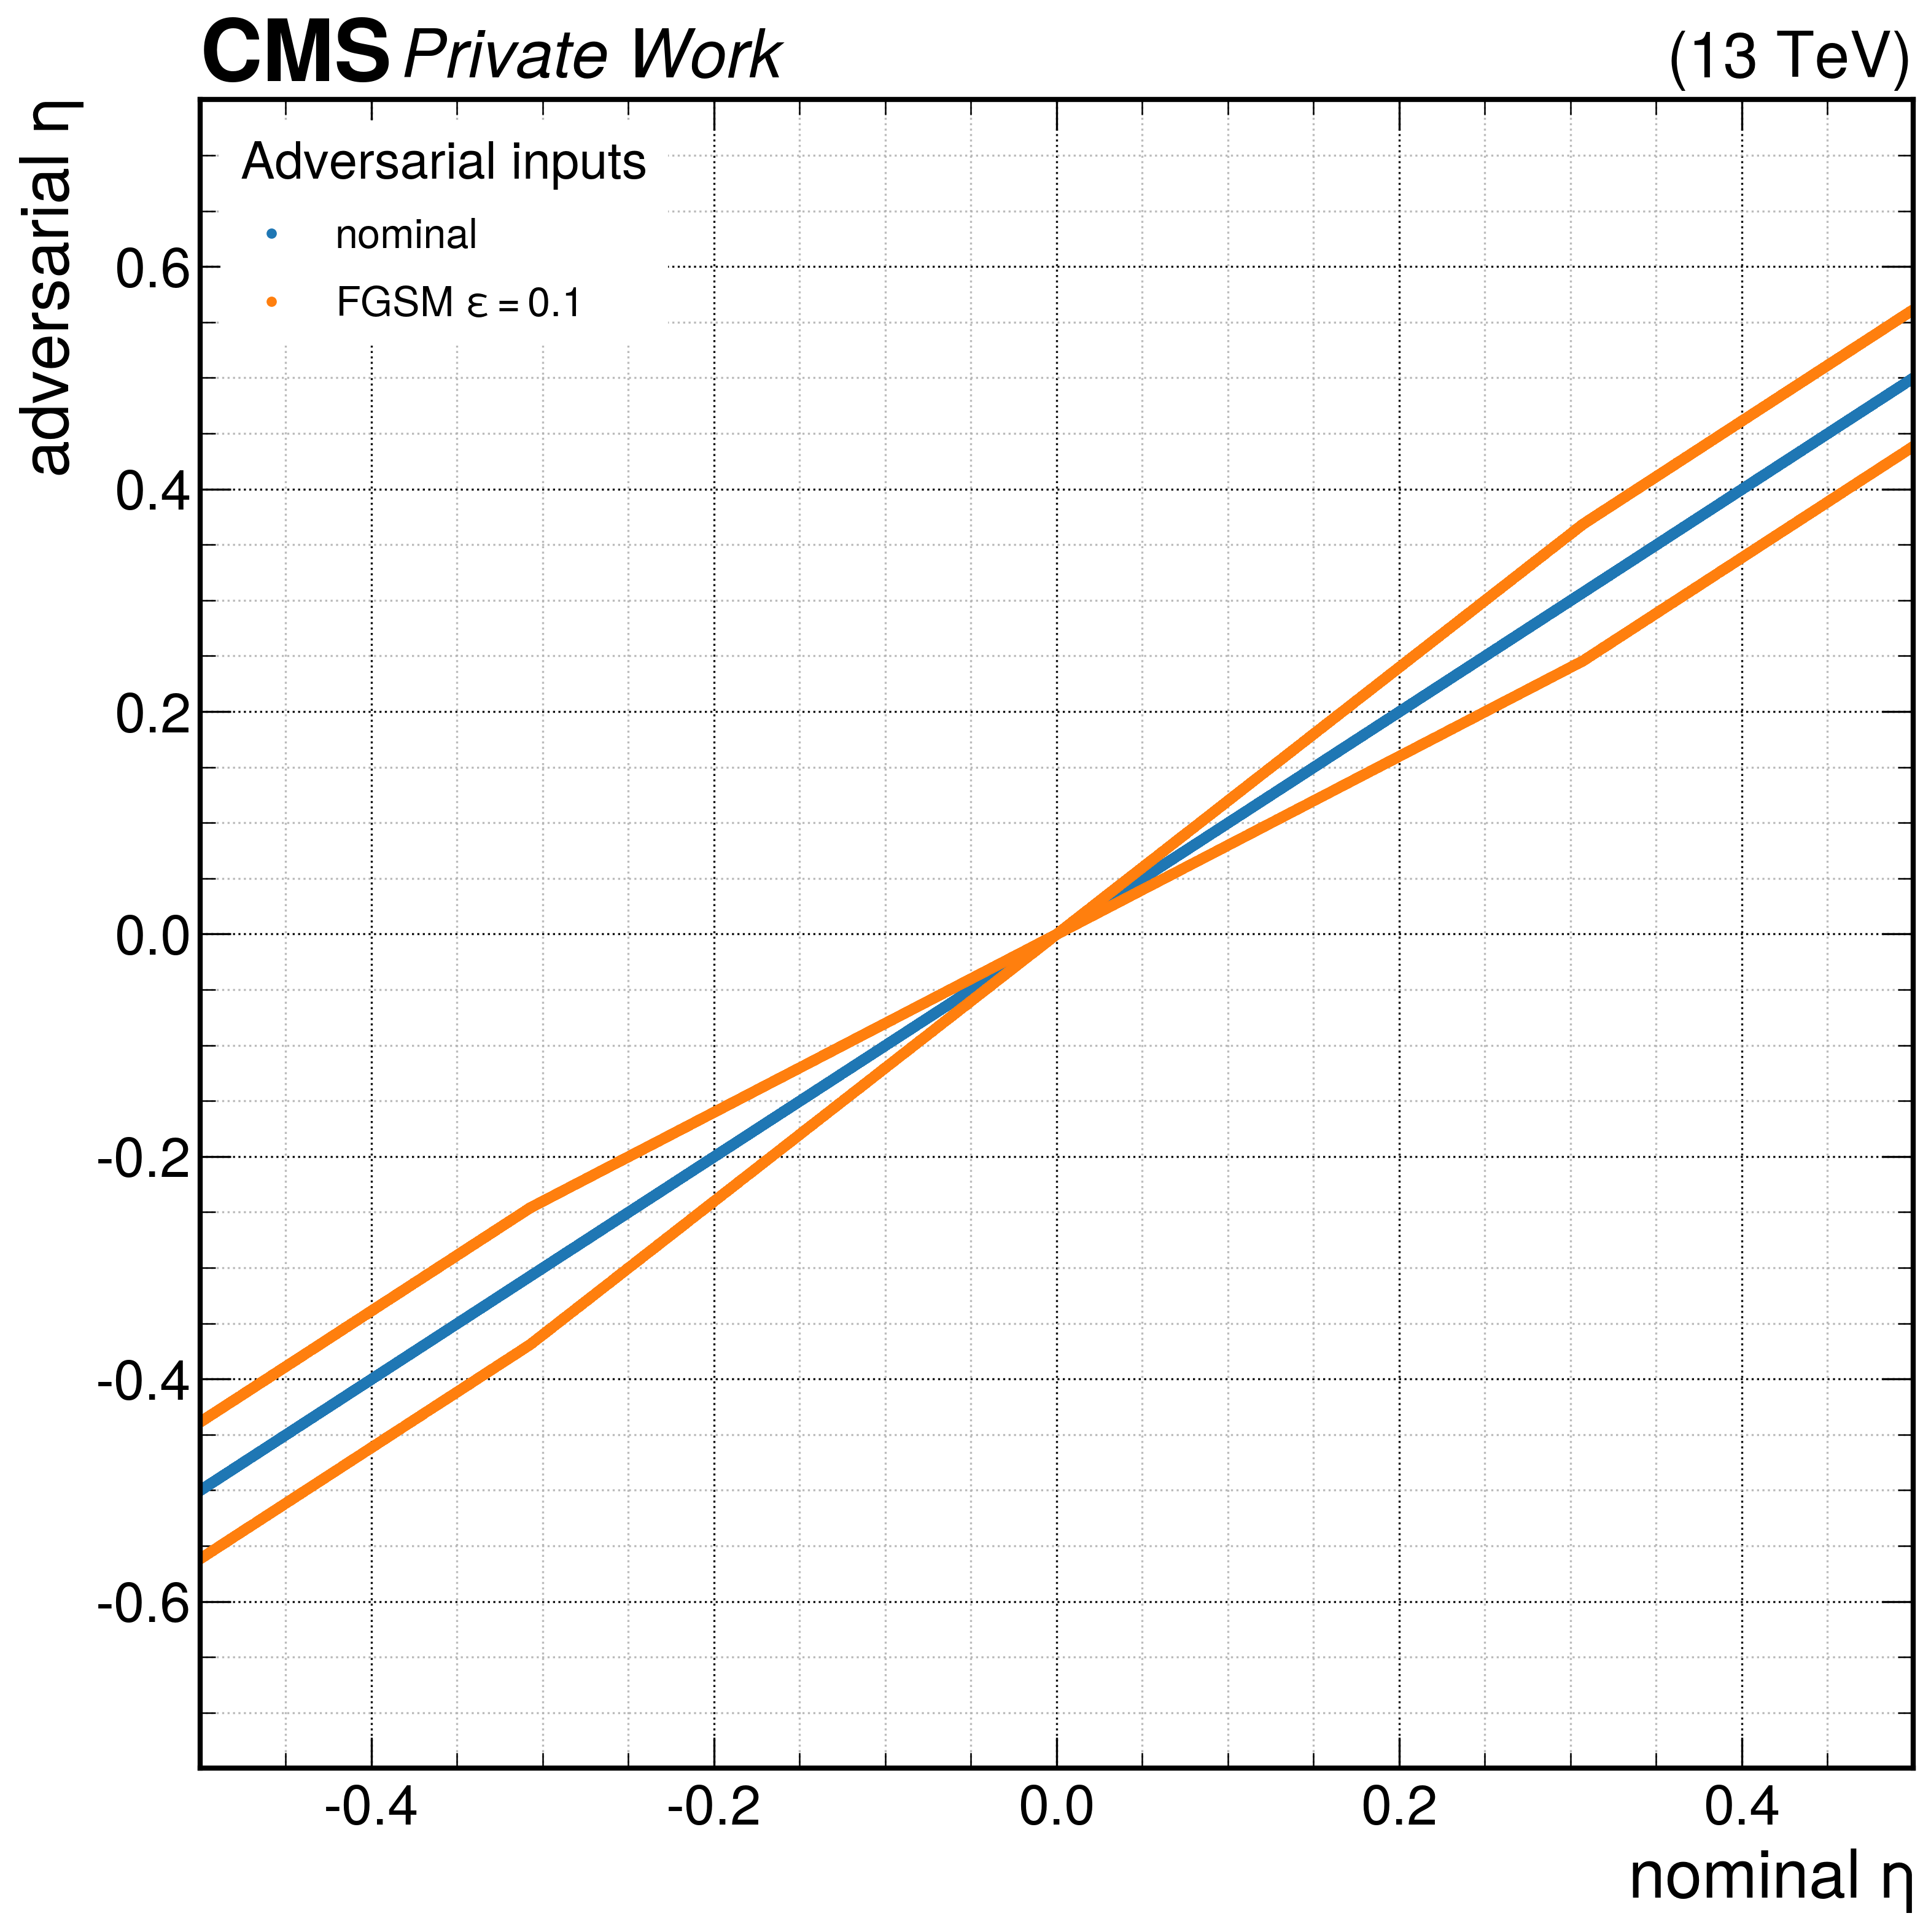

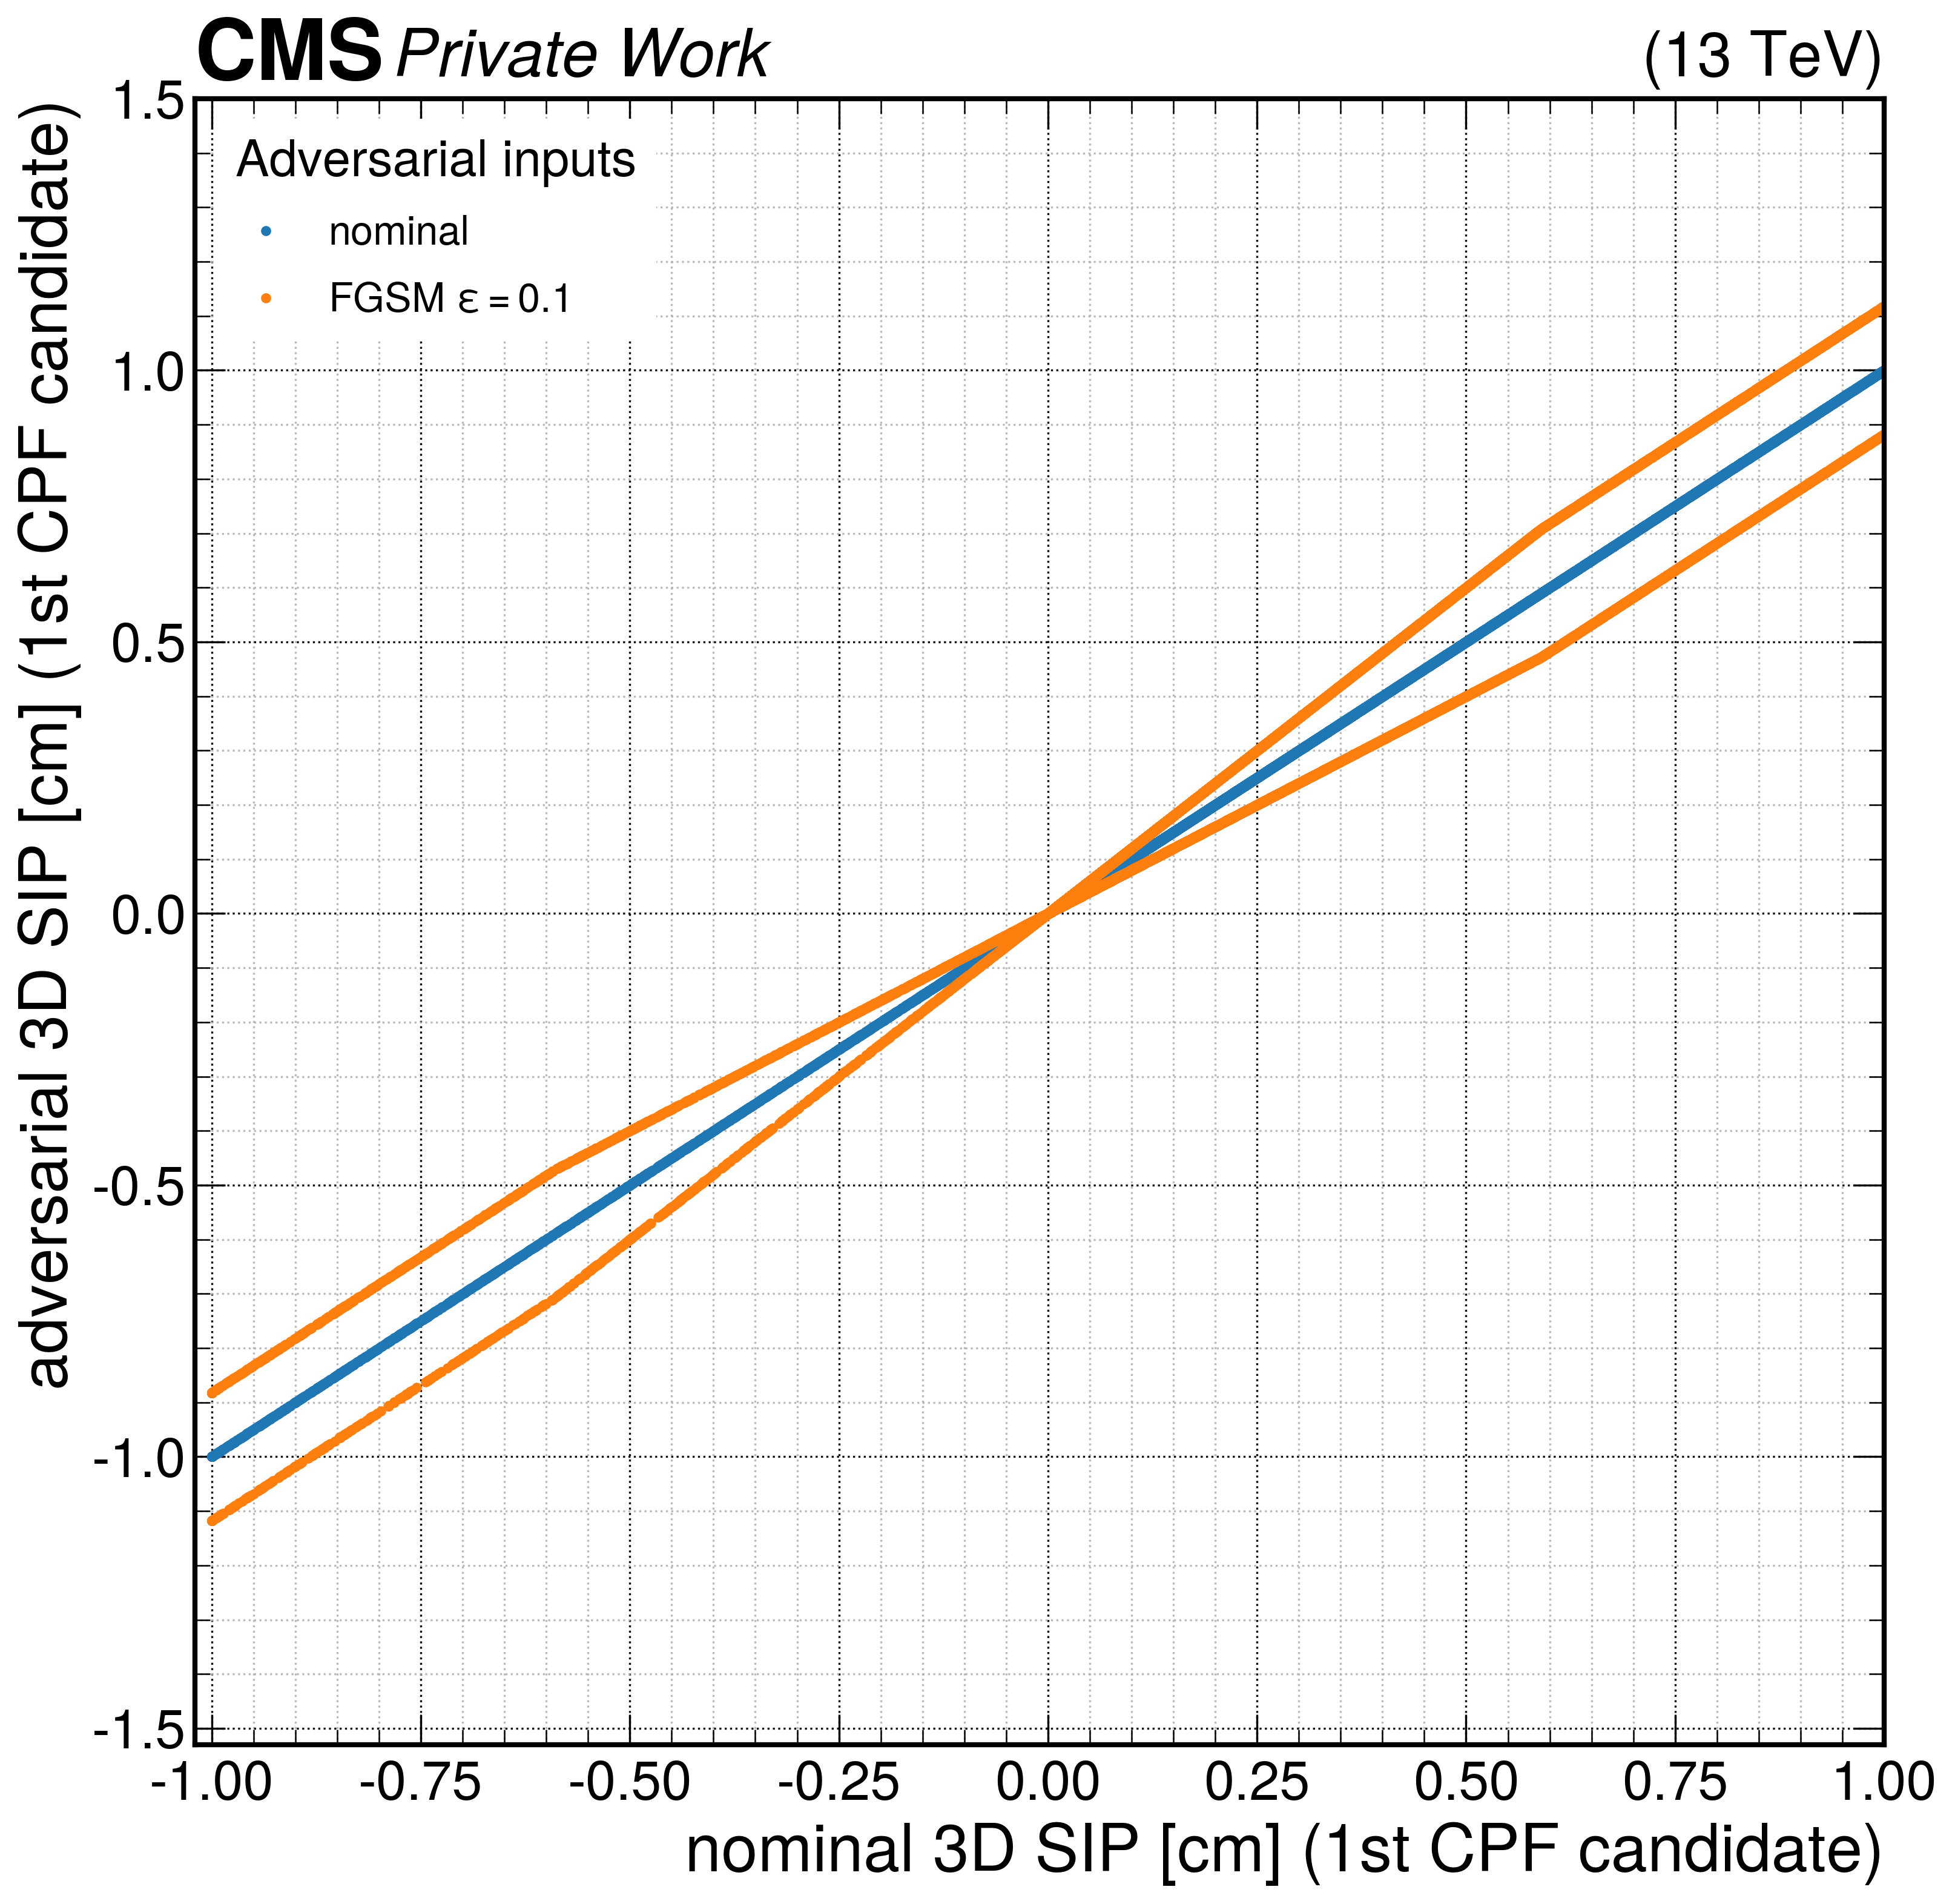

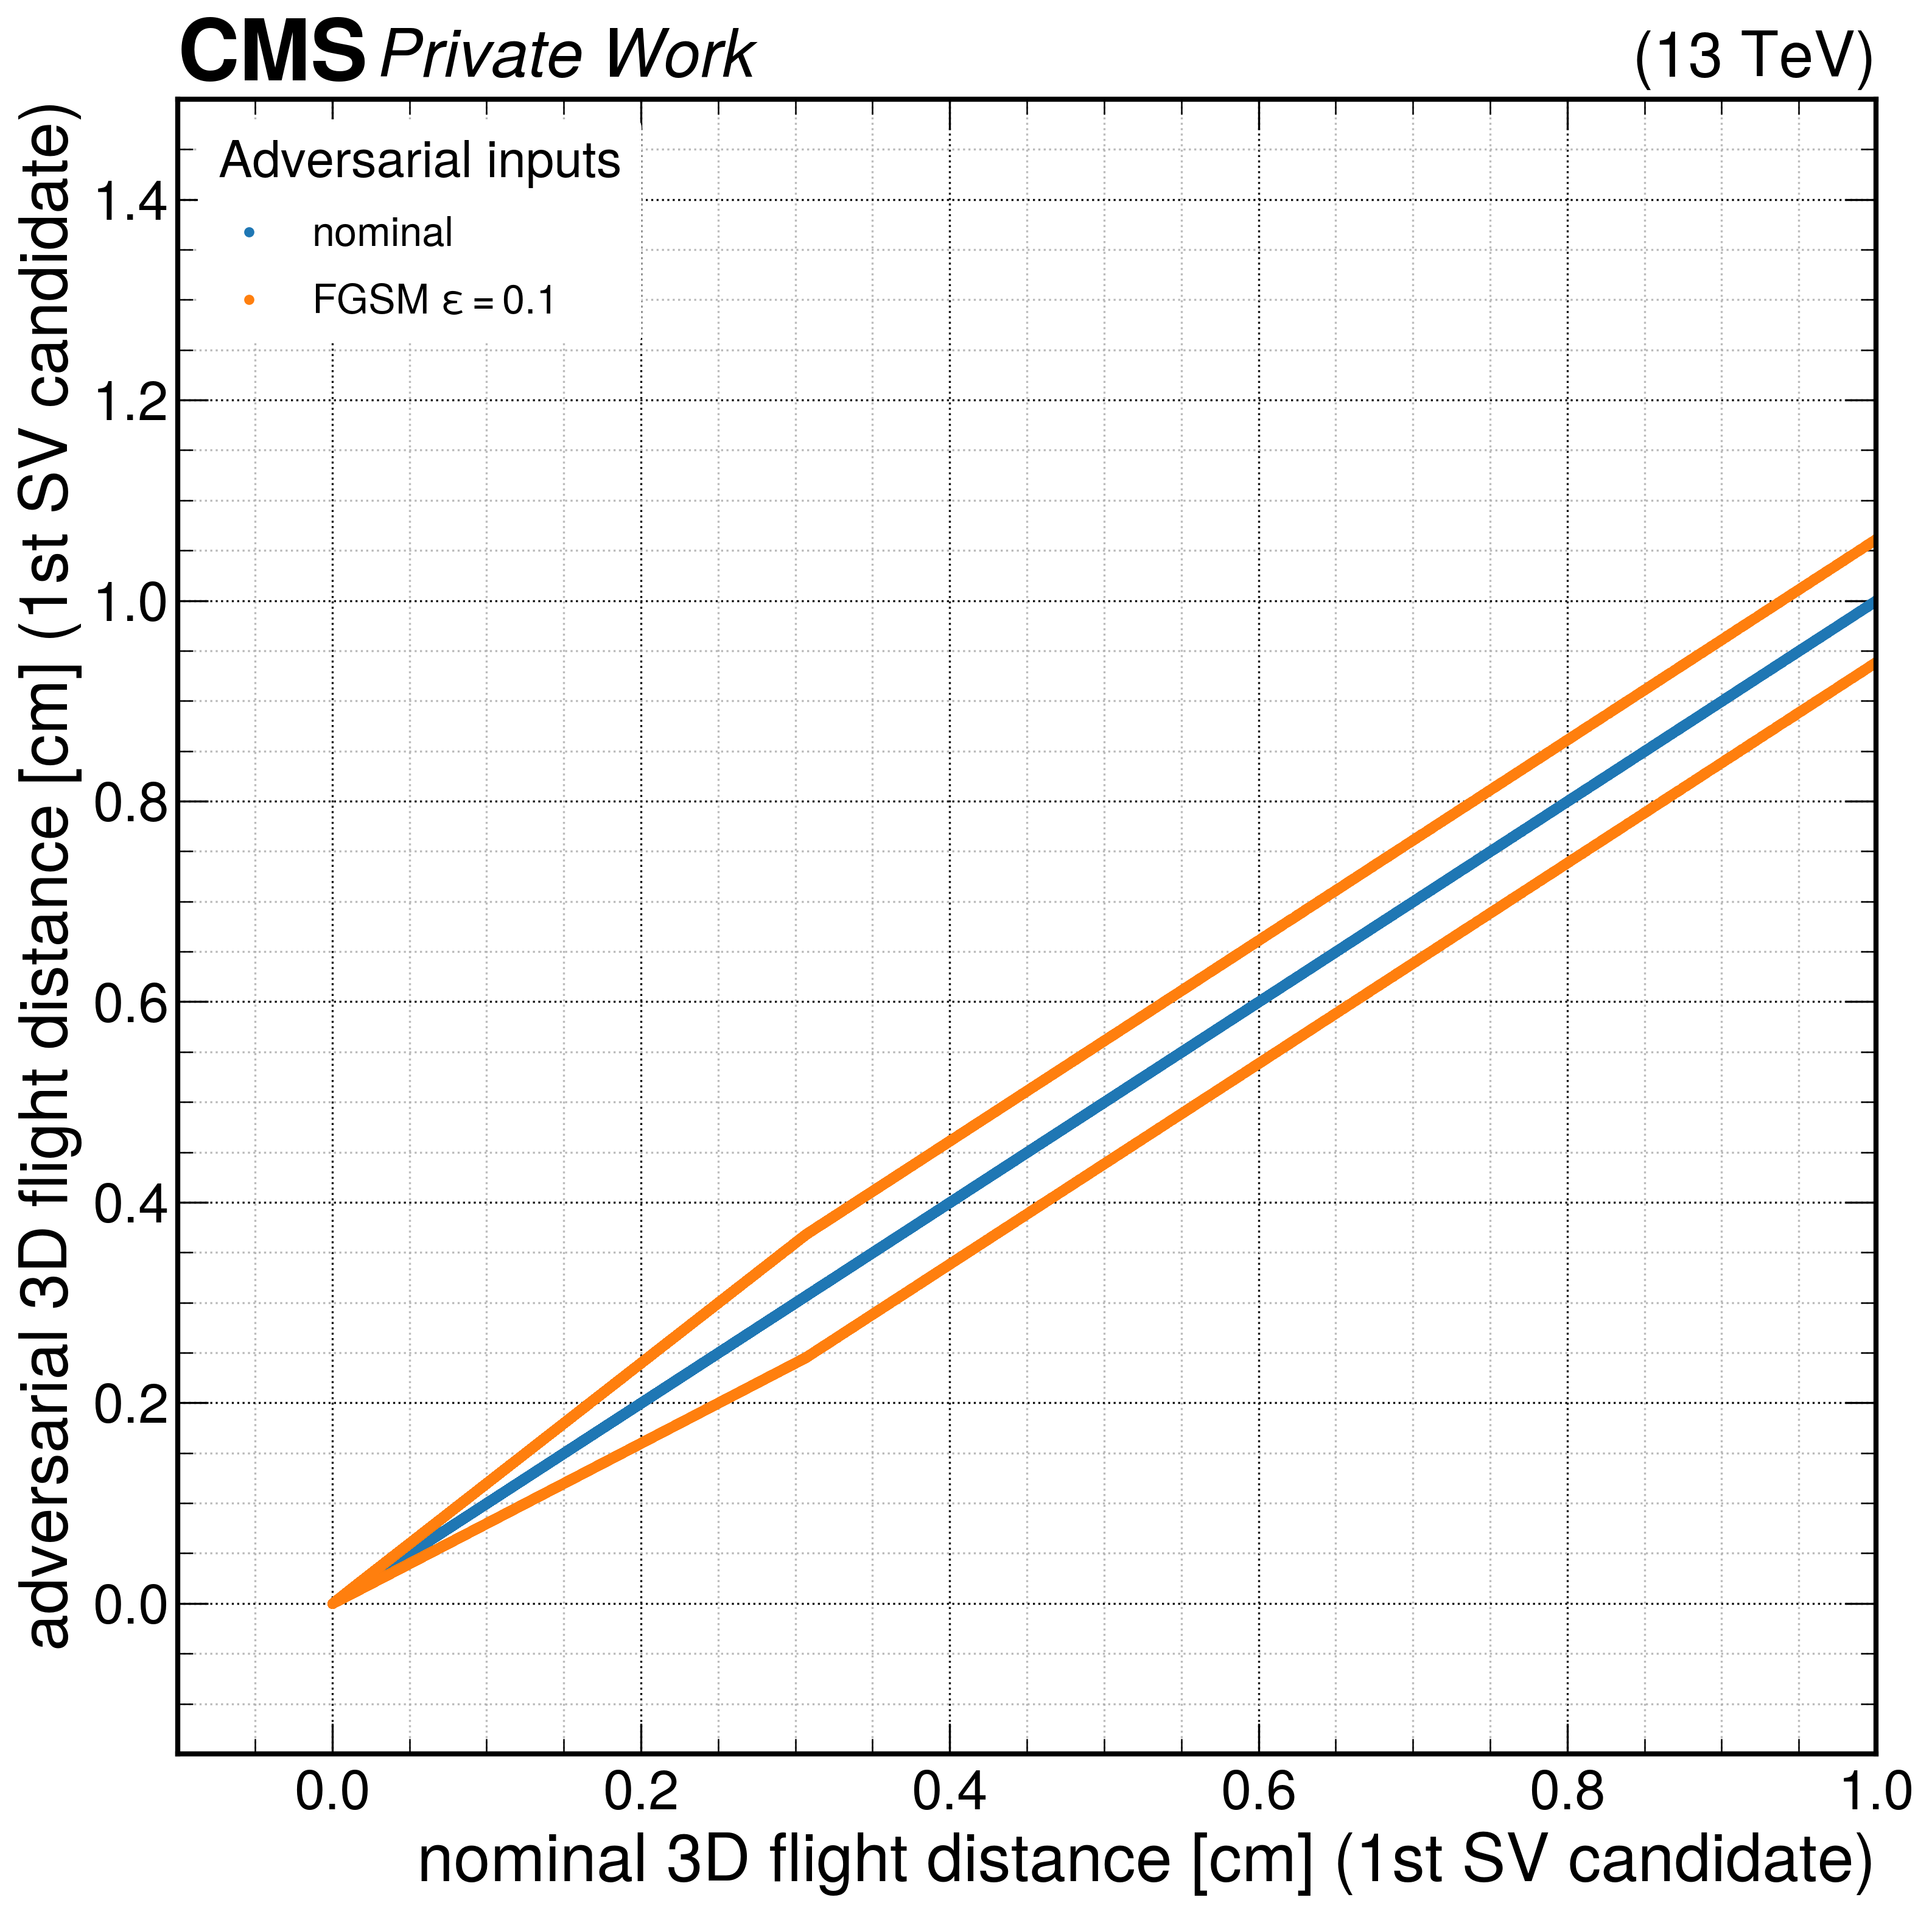

In [21]:
### Plot profiles of adversarial inputs against nominal inputs
# list of quantities and attacks to plot
quantities = ['jet_pt','jet_eta','Cpfcan_BtagPf_trackSip3dVal','sv_d3d']
attacks = ['nominal','fgsm-0_1']# 'gaussian-5', 
# set ploting ranges
quantity_ranges = {
    'jet_pt': [0,100],
    'jet_eta': [-0.5,0.5],
    'Cpfcan_BtagPf_trackSip3dVal': [-1.02,1],
    'Cpfcan_BtagPf_trackSip3dSig': [-1,10],
    'sv_d3d': [-0.1,1],
    'sv_d3dsig': [-0.1,10],
}

for quantity in quantities:
    quantity_array = get_array(quantity)
    ranges = quantity_ranges[quantity]
    # make figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    ax.set_ylim(bottom=ranges[0]-0.5*abs(ranges[0]), top=ranges[1]+0.5*abs(ranges[1]))
    ax.set_xlim(left=ranges[0], right=ranges[1])
    ax.set_ylabel('adversarial '+quantity_labels[quantity])
    ax.set_xlabel('nominal '+quantity_labels[quantity])
    ax.grid(which='minor', alpha=0.85)
    ax.grid(which='major', alpha=0.95, color='black')
    # plot histograms
    for attack in attacks:
        adv_quantity_array = get_array(quantity, attack=attack)
        label = attack_labels[attack]
        color = attack_colors[attack]
        ax.plot(quantity_array, adv_quantity_array, label=label, color=color, linestyle='None', marker='.') 
    legloc = 'upper left'
    leg=ax.legend(title='Adversarial inputs', fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
    if 'right' in legloc:
        aligned = 'right'
    else:
        aligned = 'left'
    leg._legend_box.align = aligned
    leg.get_frame().set_linewidth(0.0)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    fig.savefig('{}/attacks/attack_profile-{}.png'.format(saveDir,quantity))

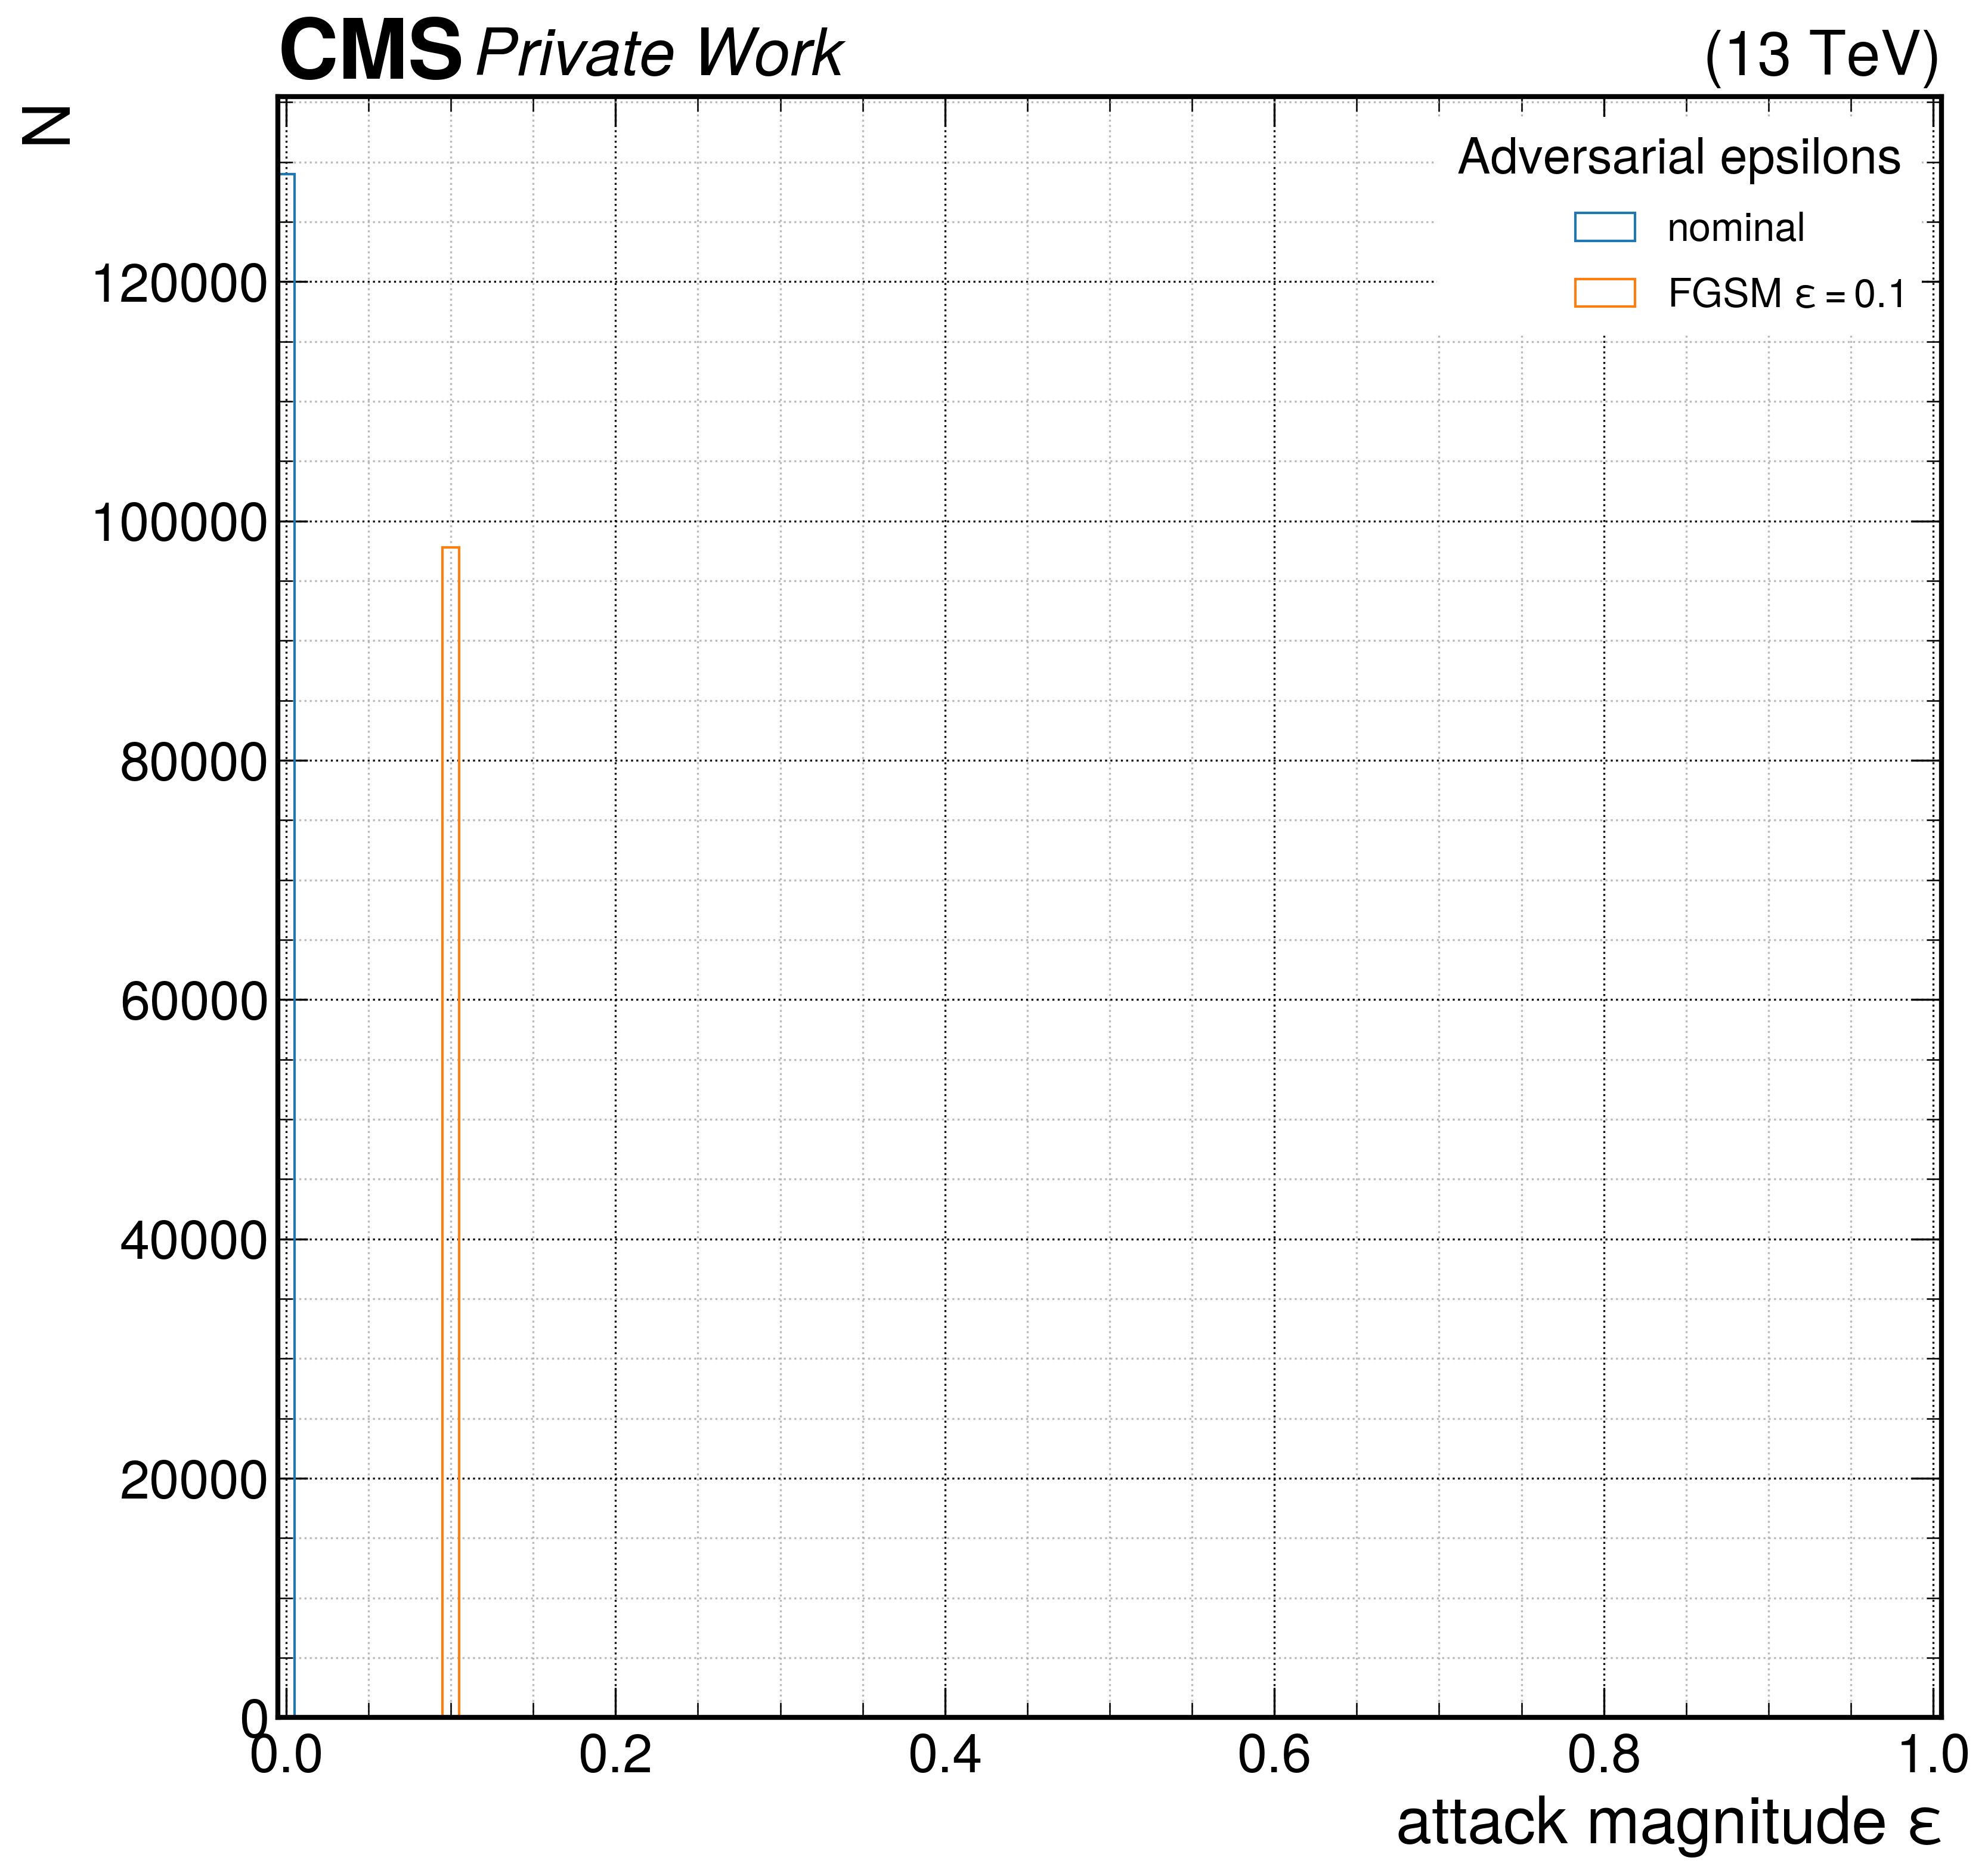

In [13]:
### Plot attack magnitudes (epsilons) of the adversarial inputs

quantity = 'jet_pt'
quantity_delta = global_deltas[0]
restrict_impact = 0.2
# list of attacks
attacks = ['nominal', 'fgsm-0_1']
# choose binning: [left edge, right edge, Nbins] and center it
binning = [0,1,100]
binwidth = (binning[1]-binning[0])/binning[2]
left_edge = binning[0] - 0.5 * binwidth
right_edge = binning[1] + 0.5 * binwidth
Nbins = binning[2] + 1

# make figure
fig,ax = plt.subplots(figsize=[12,12], dpi=300)
ax.set_xlim(left = left_edge, right = right_edge)
ax.set_ylabel('N')
ax.set_xlabel('attack magnitude $\epsilon$')
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
for attack in attacks:
    quantity_array = get_array(quantity)
    adv_quantity_array = get_array(quantity, attack=attack)
    label = attack_labels[attack]
    color = attack_colors[attack]
    # calculate epsilons (reverse engineering)
    delta = np.abs(adv_quantity_array-quantity_array)
    no_restrict_impact = np.where(np.abs(delta/quantity_array-restrict_impact)>0.00001)[0]
    epsilons = delta[no_restrict_impact]/quantity_delta
    # plot histogram
    ax.hist(epsilons, range=(left_edge,right_edge), bins=Nbins, label=label, color=color, histtype='step')
legloc = 'upper right'
leg=ax.legend(title='Adversarial epsilons', fontsize=16, title_fontsize=20, labelspacing=0.7, loc=legloc, frameon=True, framealpha=1, facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
fig.savefig('{}/attacks/attack-epsilons.pdf'.format(saveDir))

global
[7.60120430e+02 2.39266221e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.92823174e-01 1.32771148e+00
 0.00000000e+00 2.57519535e-02 7.78074743e+00 4.69124312e-02
 1.21450884e+01 0.00000000e+00 0.00000000e+00]
0.02575195347890258
15
(15,)
minimum:  0.02575195347890258  , maximum:  760.1204301261915
cpf
[[2.20050010e+00 3.07851730e+00 3.10773094e+00 3.11908831e+00
  3.11426341e+00 3.10532312e+00 3.08574798e+00 3.05387857e+00
  3.01050254e+00 2.97072201e+00 2.92922169e+00 2.87275156e+00
  2.81703473e+00 2.77409499e+00 2.70839547e+00 2.65052916e+00
  2.58823247e+00 2.52473098e+00 2.45691133e+00 2.39943833e+00
  2.32443462e+00 2.25724905e+00 2.17539455e+00 2.12390016e+00
  2.06223168e+00]
 [1.26515676e+00 1.46182083e+00 1.60812808e+00 1.68343321e+00
  1.72233166e+00 1.72899278e+00 1.71933750e+00 1.70181829e+00
  1.70424942e+00 1.66209459e+00 1.63072541e+00 1.58687747e+00
  1.55845366e+00 1.49163663e+00 1.44905563e+00 1.41220901e+00
  1.33606563e+00 1.28187712e+00

/net/scratch_cms3a/hschoenen/miniconda3/envs/deepjet_env/lib/python3.9/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


npf
[[4.98241340e-01 4.98919369e-01 4.99249339e-01 4.99335915e-01
  4.99382406e-01 4.99402642e-01 4.99413788e-01 4.99403715e-01
  4.99395609e-01 4.99377519e-01 4.99340505e-01 4.99307961e-01
  4.99243975e-01 4.99170155e-01 4.99072075e-01 4.98918296e-01
  4.98667926e-01 4.98214991e-01 4.97172787e-01 4.76714334e-01
  1.37303434e-40 1.37308339e-40 1.37312543e-40 1.37318148e-40
  1.37323753e-40]
 [2.98967512e-01 2.96872241e-01 2.92946459e-01 2.89762621e-01
  2.85304276e-01 2.80107590e-01 2.74364873e-01 2.68346723e-01
  2.61321861e-01 2.54225636e-01 2.45378709e-01 2.34864789e-01
  2.24741597e-01 2.11565166e-01 1.99290772e-01 1.83787467e-01
  1.66961751e-01 1.49218348e-01 1.27142520e-01 1.00346200e-01
  1.37303434e-40 1.37308339e-40 1.37312543e-40 1.37318148e-40
  1.37323753e-40]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+0

/net/scratch_cms3a/hschoenen/miniconda3/envs/deepjet_env/lib/python3.9/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


vtx
[[1.34928365e+02 8.56325742e+01 4.56010625e+01 1.29802012e+01]
 [2.48205290e-01 2.46557087e-01 2.41851906e-01 2.15121890e-01]
 [4.66542737e+00 3.50620414e+00 1.88486547e+00 5.65892782e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.20011016e+00 4.55351436e+00 2.79856685e+00 7.34671682e-01]
 [2.98187121e+00 1.72064016e+00 7.97596854e-01 2.72195344e-01]
 [5.75093522e+00 1.62356606e+00 3.17154133e-01 3.33014016e-02]
 [1.23886993e+02 2.11365918e+01 5.33771828e+00 1.48716352e+00]
 [8.91045843e+00 2.75936223e+00 4.58874837e-01 4.89960622e-02]
 [1.23712980e+02 2.12060796e+01 5.36847391e+00 1.49671645e+00]
 [4.99999911e-01 4.99998450e-01 4.99968082e-01 4.98710226e-01]
 [3.57425440e-01 1.95083349e-01 8.88632682e-02 2.31870170e-02]]
0.023187017031014046
12
(12, 4)
minimum:  0.023187017031014046  , maximum:  134.928365478516


/net/scratch_cms3a/hschoenen/miniconda3/envs/deepjet_env/lib/python3.9/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/net/scratch_cms3a/hschoenen/miniconda3/envs/deepjet_env/lib/python3.9/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


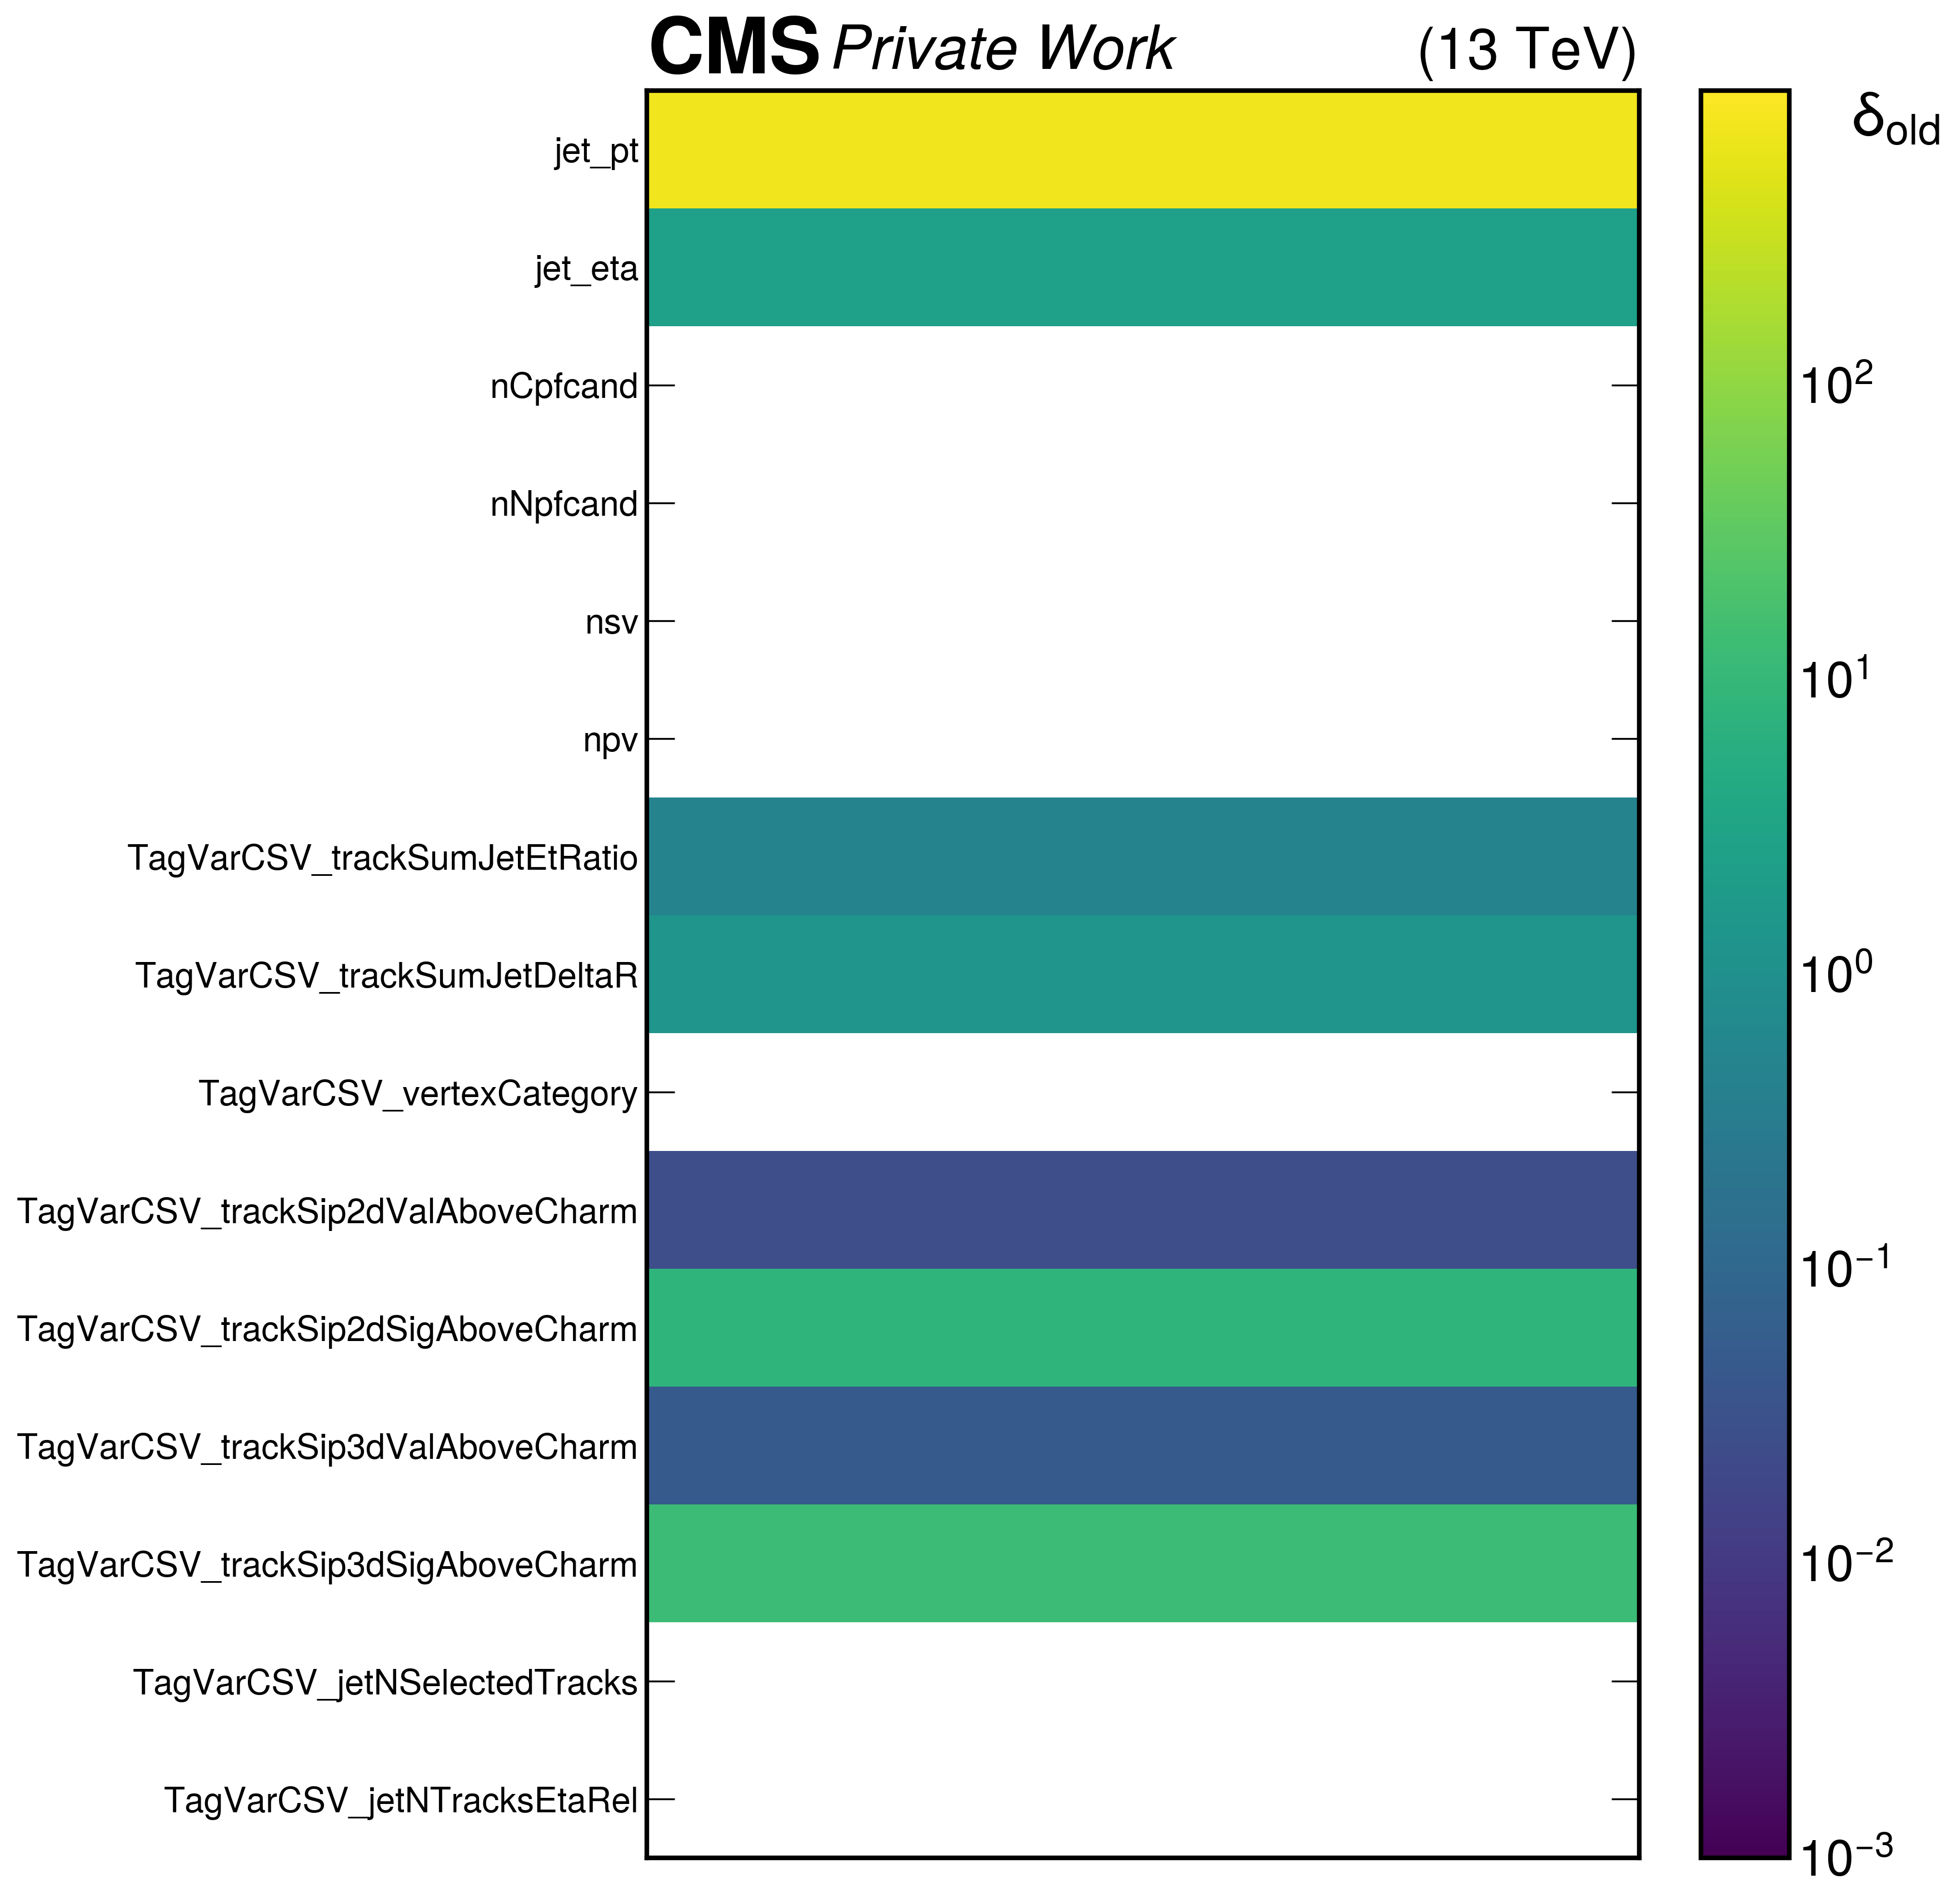

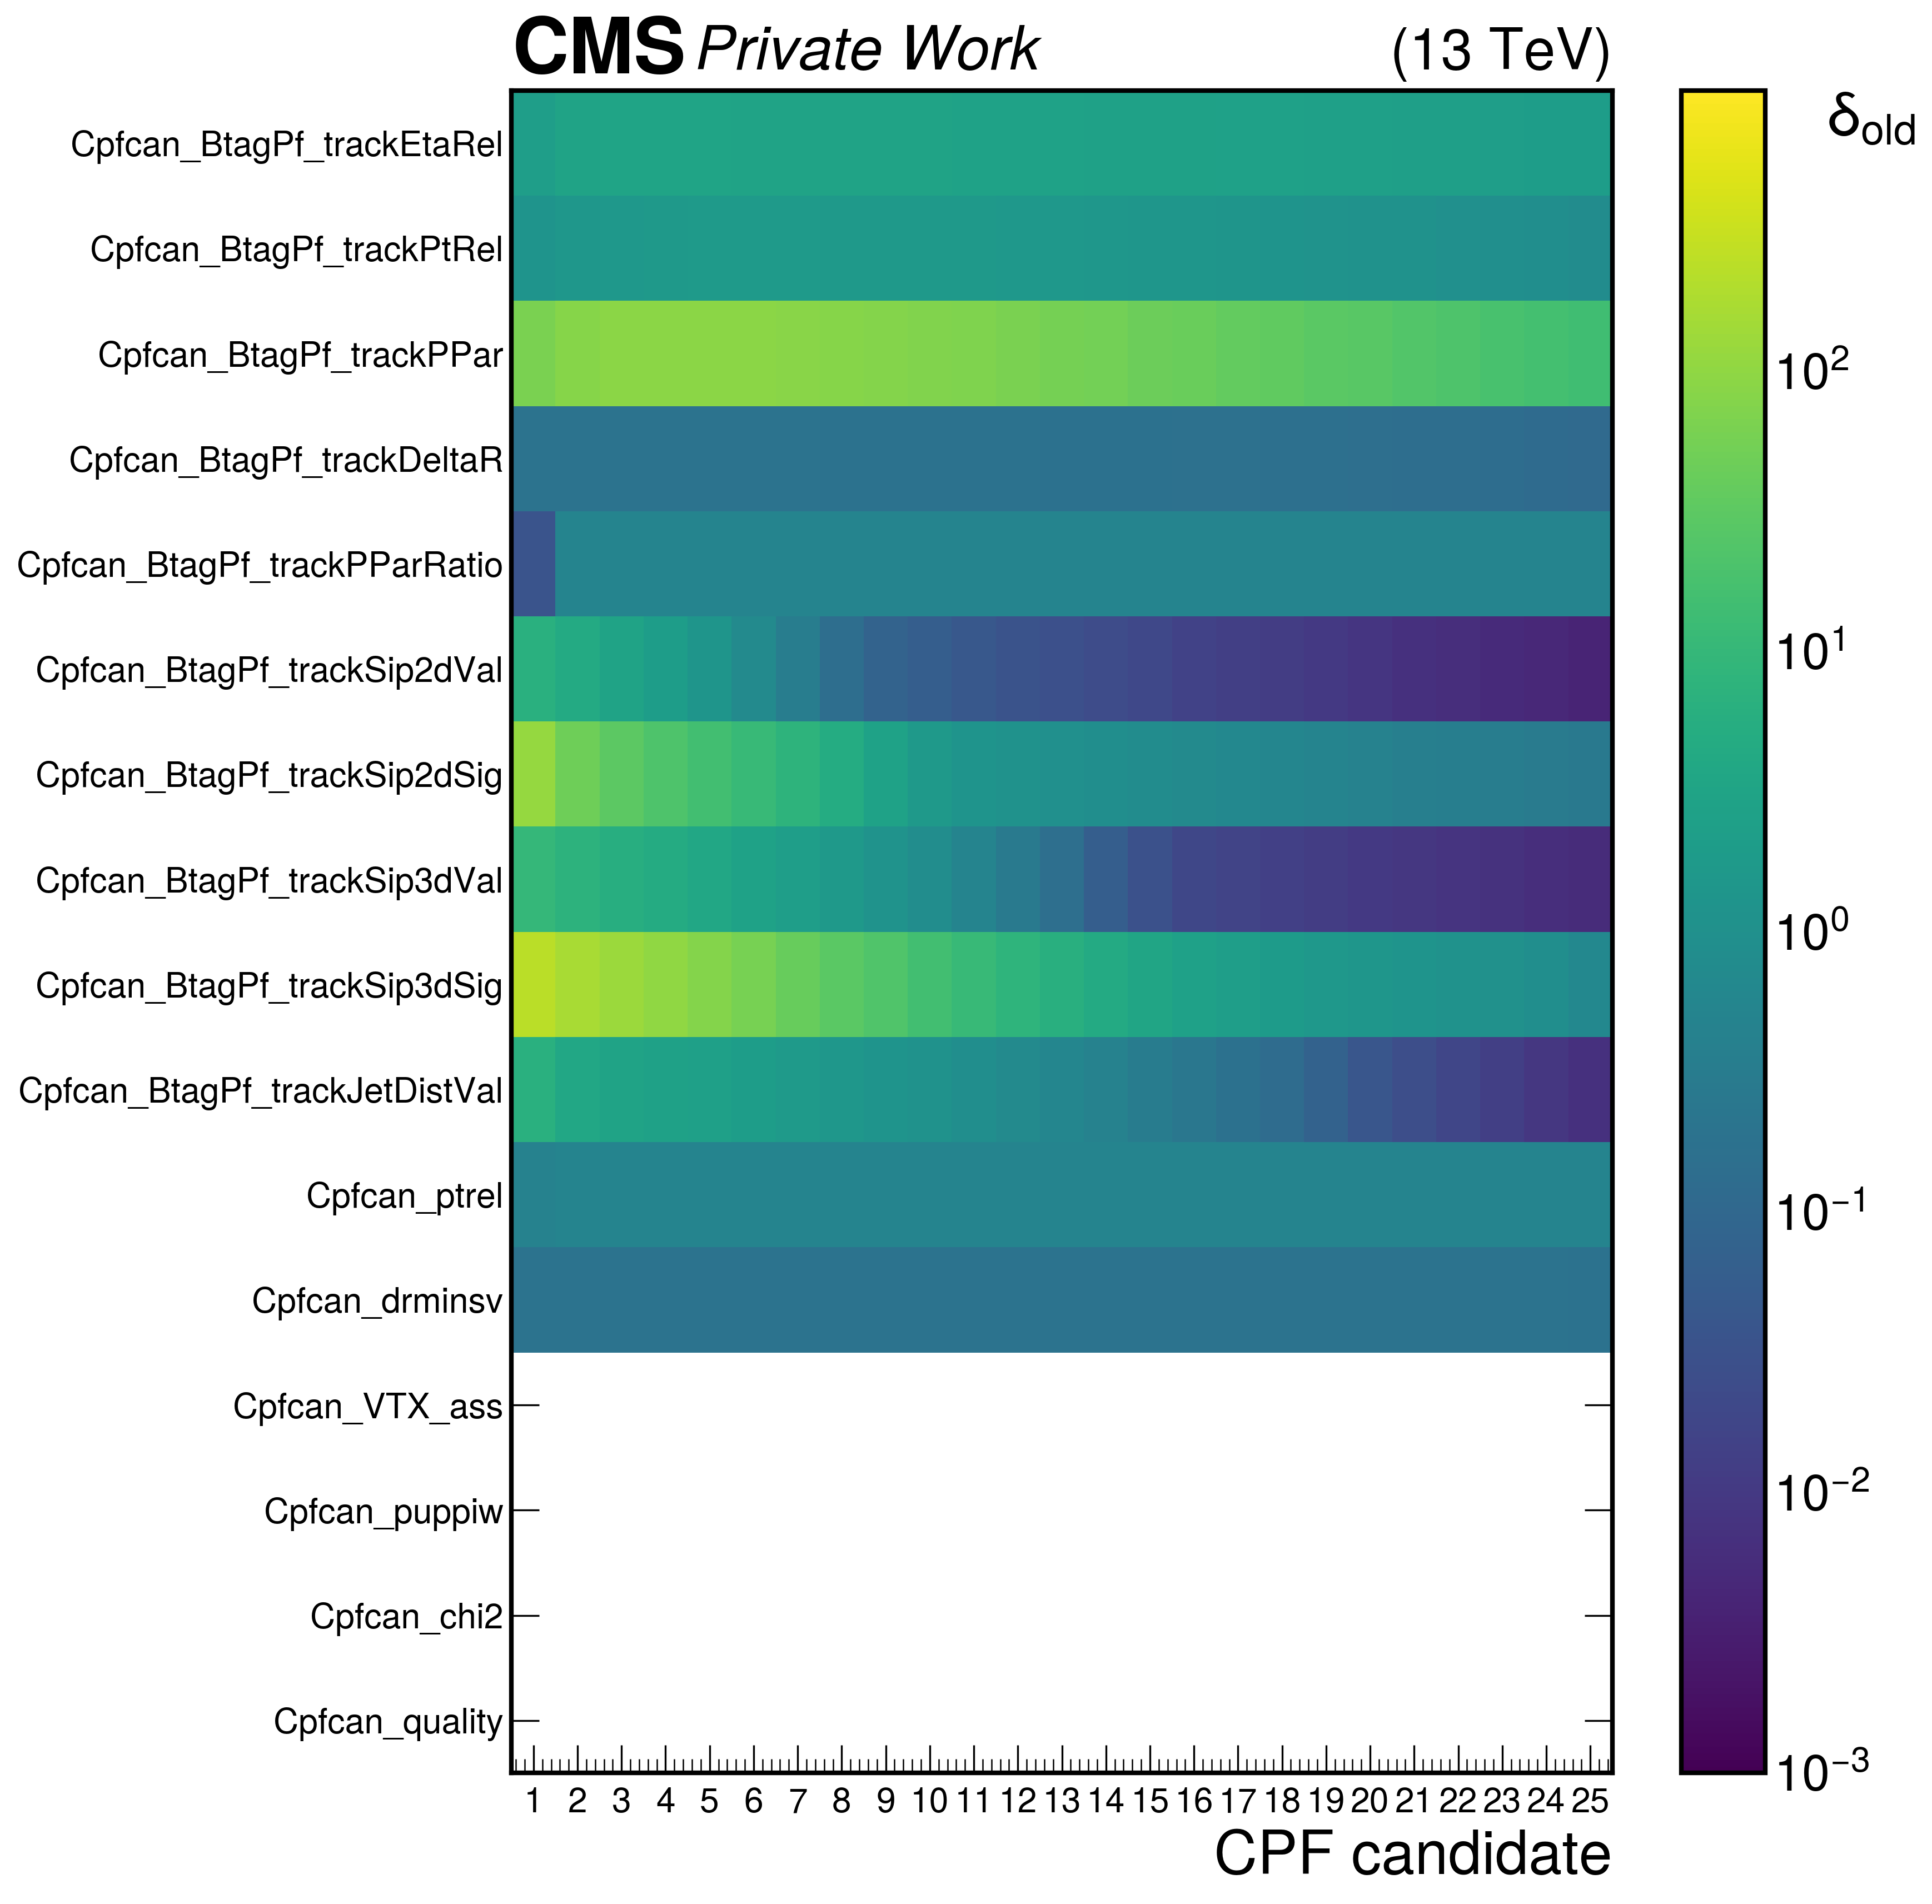

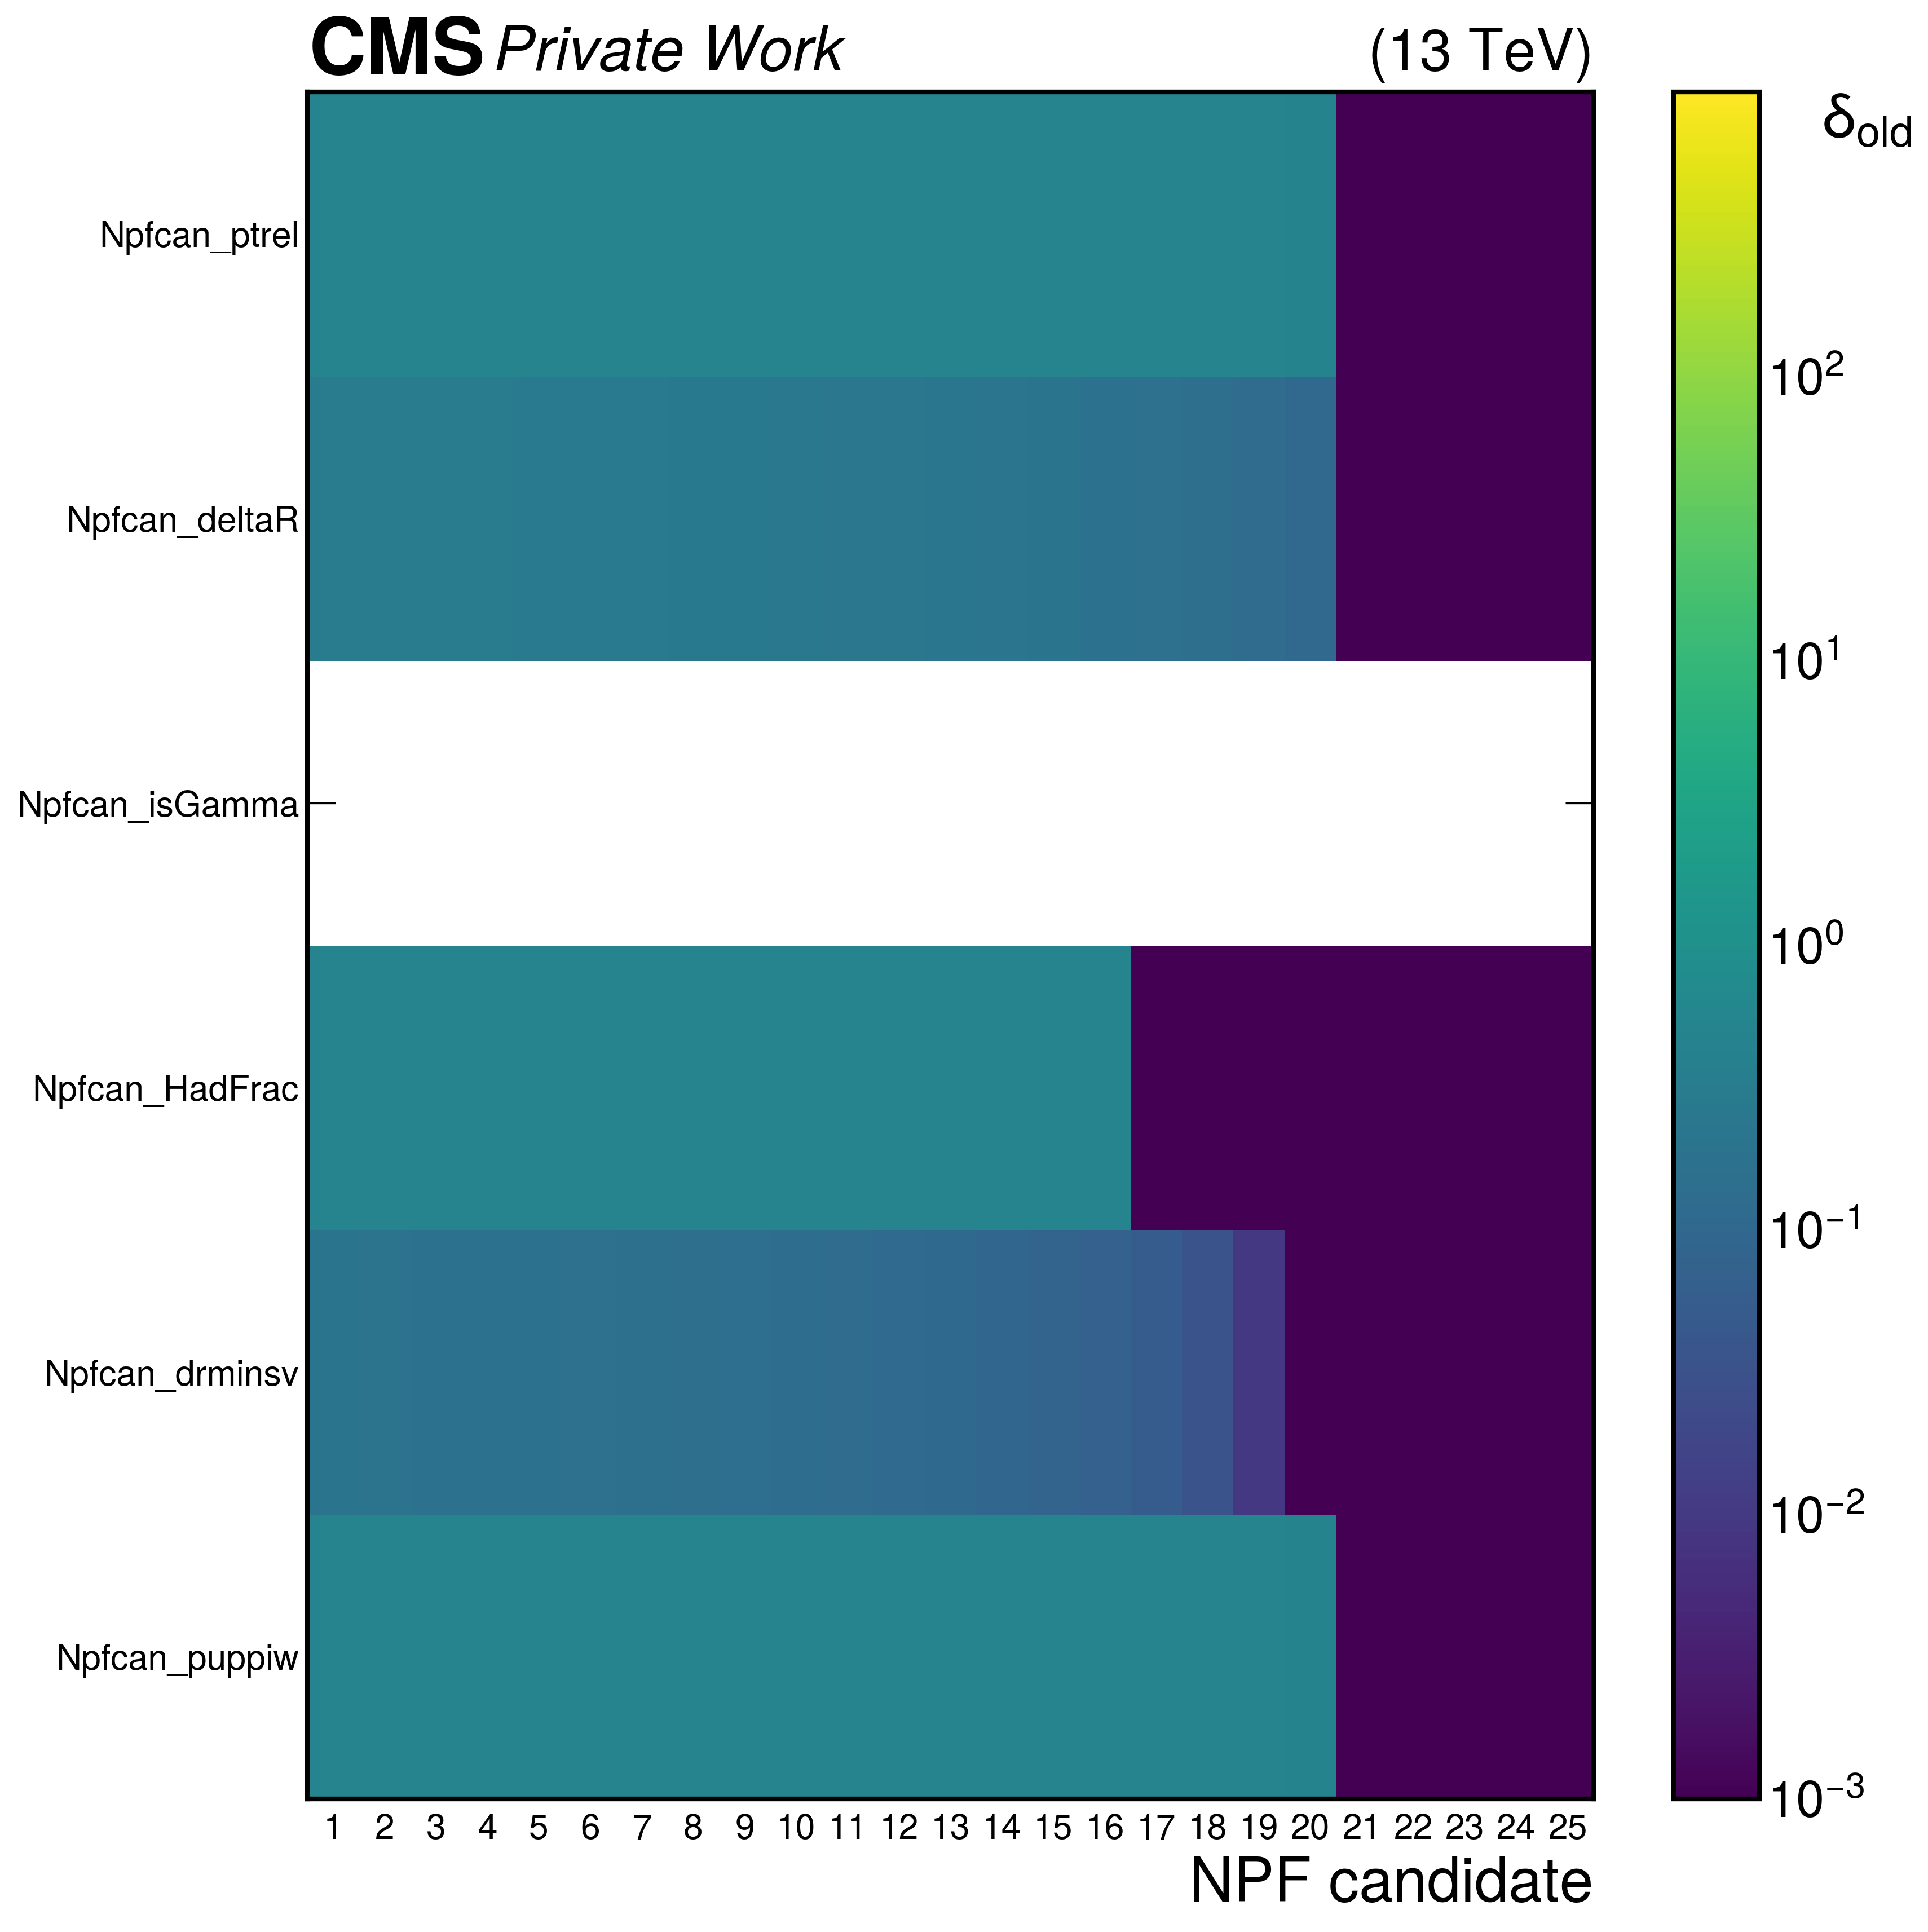

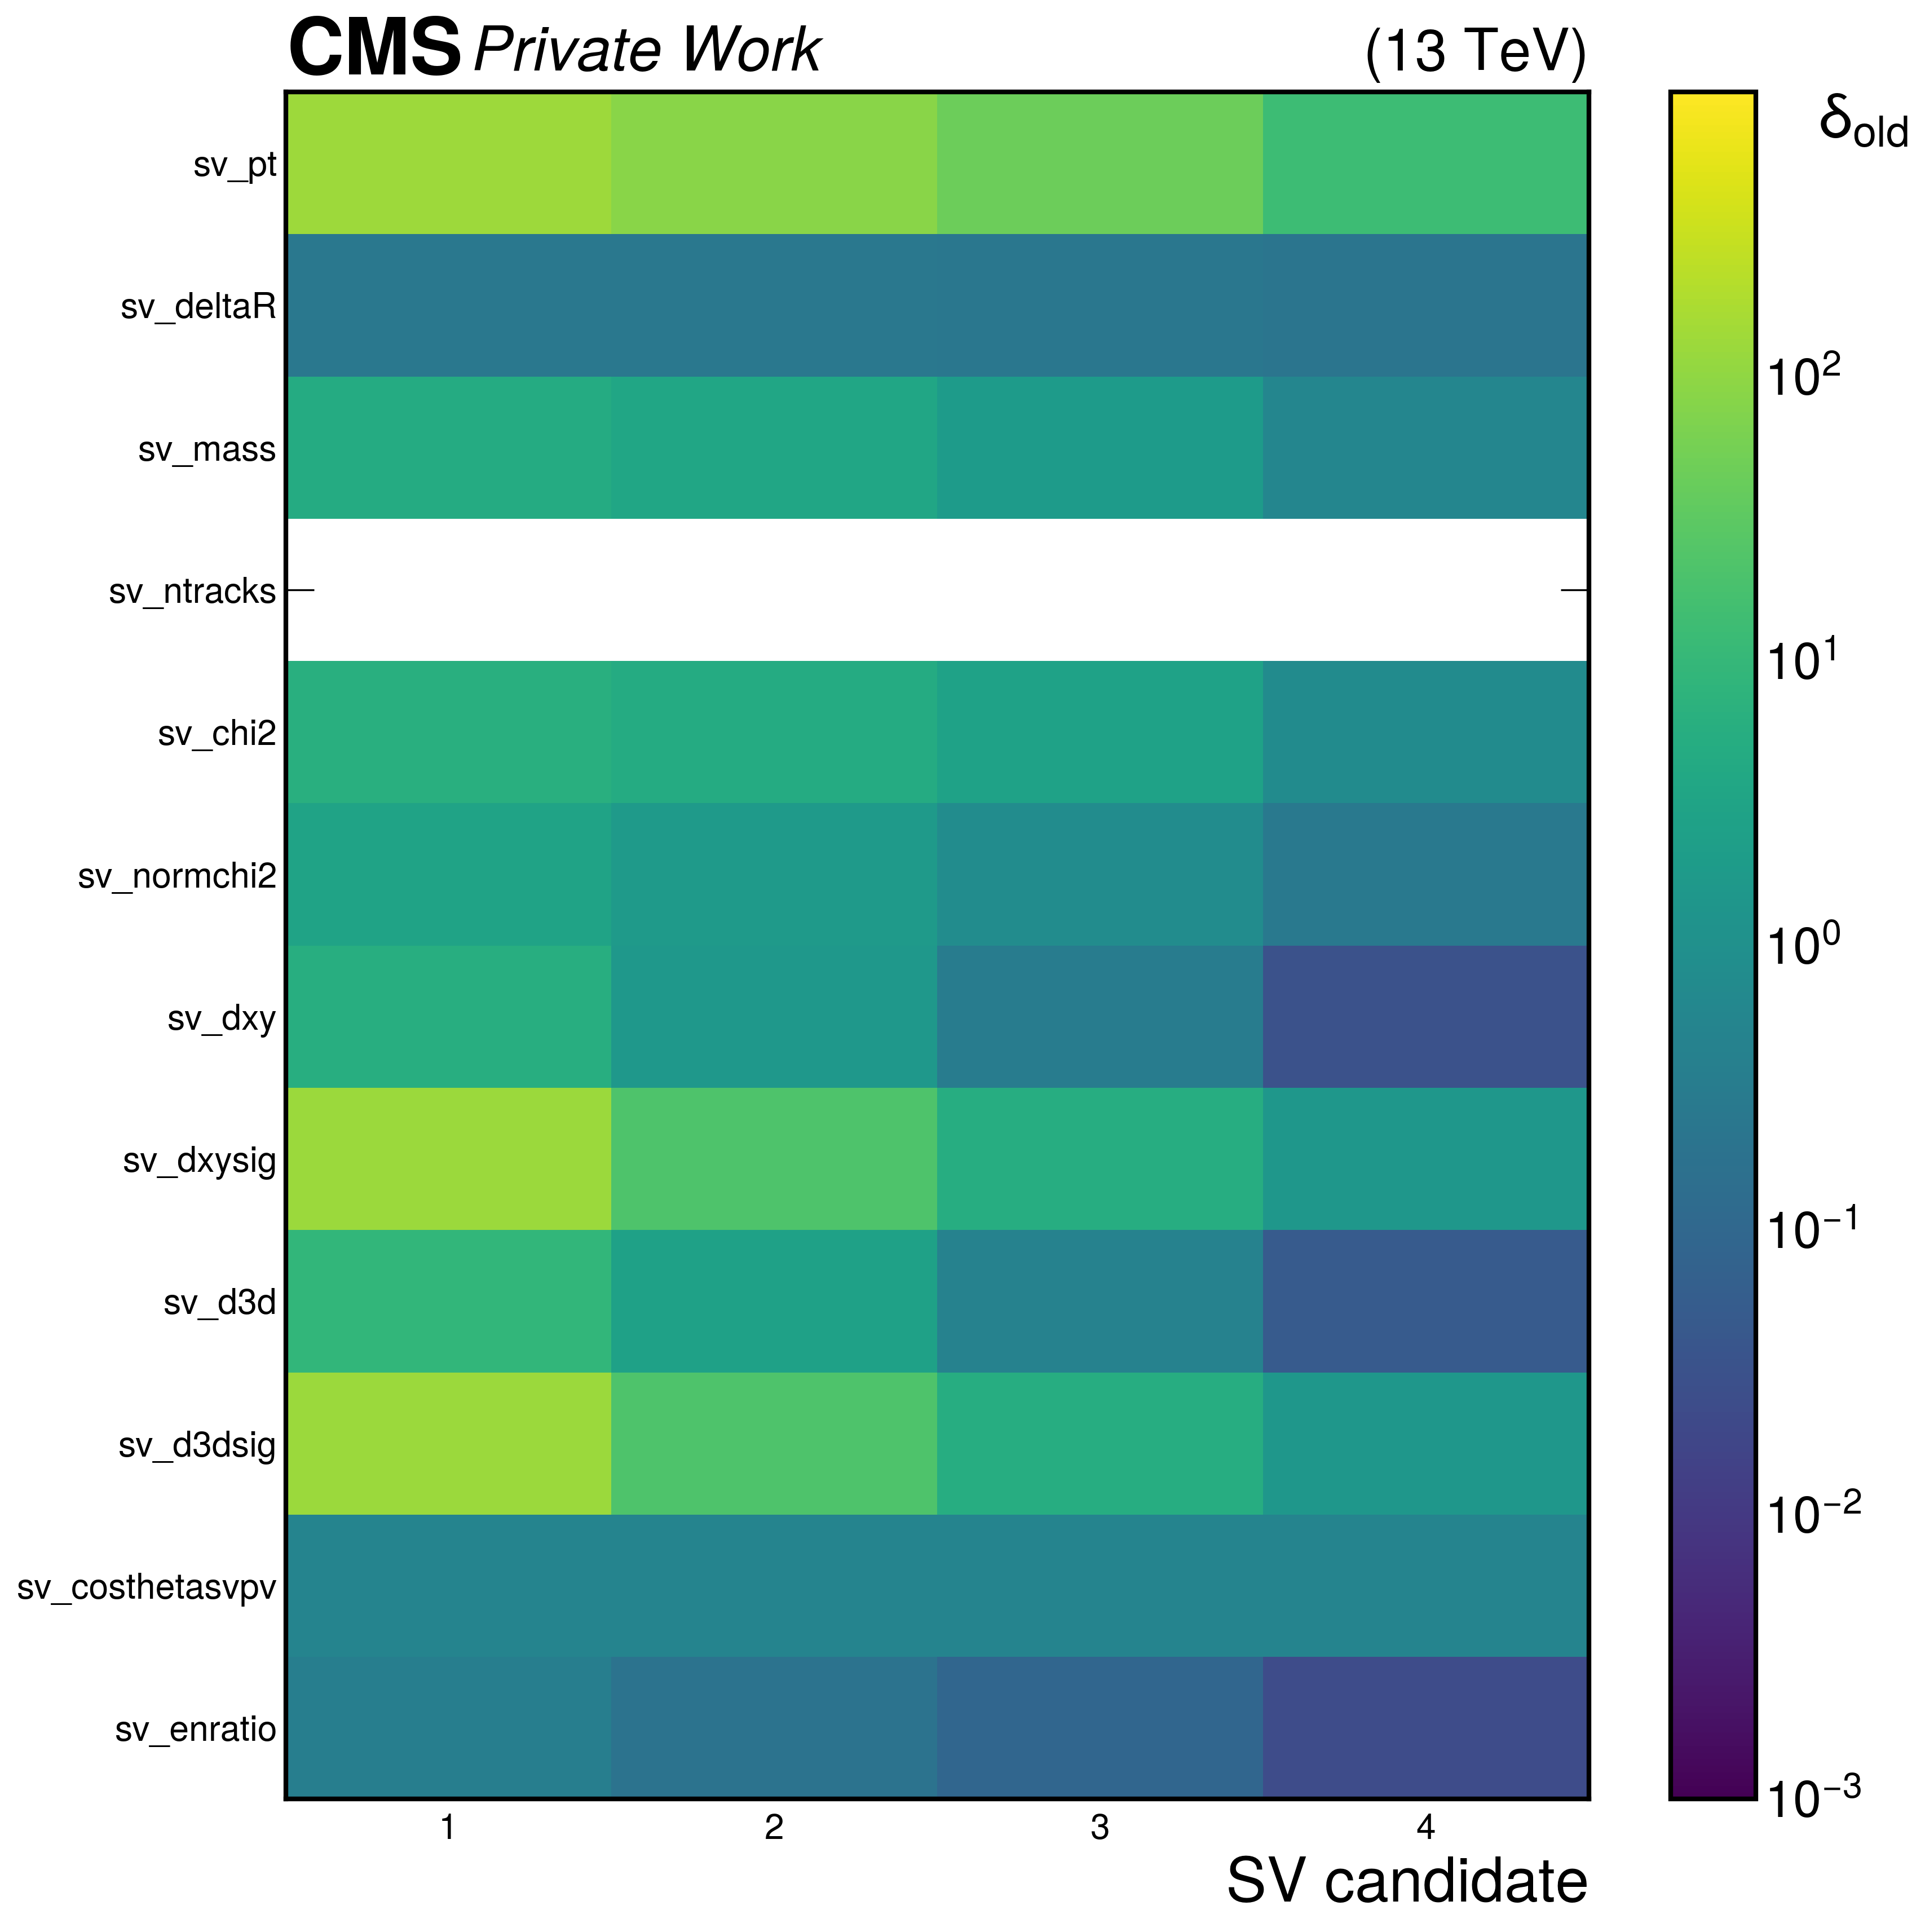

In [18]:
### Plot delta values

mode = '_old'
if mode=='_old':
    global_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_epsilons.npy')
    cpf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_epsilons.npy')
    npf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_epsilons.npy')
    vtx_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_epsilons.npy')
else:
    global_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/global_standardized_epsilons.npy')
    cpf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/cpf_standardized_epsilons.npy')
    npf_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/npf_standardized_epsilons.npy')
    vtx_deltas = np.load('/home/home1/institut_3a/hschoenen/repositories/DeepJet/epsilons/vtx_standardized_epsilons.npy')

integer_variables = ['nCpfcand','nNpfcand', 'nsv','npv', 'TagVarCSV_vertexCategory', 'TagVarCSV_jetNSelectedTracks', 'TagVarCSV_jetNTracksEtaRel',
                     'Cpfcan_VTX_ass', 'Cpfcan_puppiw', 'Cpfcan_chi2', 'Cpfcan_quality', 'Npfcan_isGamma', 'sv_ntracks']

for vartype in ['global','cpf','npf','vtx']:
    print(vartype)
    if vartype == 'global':
        rating = global_deltas
        N_objects = 1
        x_label = ''
        variables = ['jet_pt','jet_eta', 'nCpfcand','nNpfcand', 'nsv','npv', 'TagVarCSV_trackSumJetEtRatio', 'TagVarCSV_trackSumJetDeltaR', 'TagVarCSV_vertexCategory', 'TagVarCSV_trackSip2dValAboveCharm', 'TagVarCSV_trackSip2dSigAboveCharm', 'TagVarCSV_trackSip3dValAboveCharm', 'TagVarCSV_trackSip3dSigAboveCharm', 'TagVarCSV_jetNSelectedTracks', 'TagVarCSV_jetNTracksEtaRel']
    elif vartype == 'cpf':
        rating = cpf_deltas
        N_objects = 25
        x_label = 'CPF candidate'
        variables = ['Cpfcan_BtagPf_trackEtaRel', 'Cpfcan_BtagPf_trackPtRel', 'Cpfcan_BtagPf_trackPPar', 'Cpfcan_BtagPf_trackDeltaR', 'Cpfcan_BtagPf_trackPParRatio', 'Cpfcan_BtagPf_trackSip2dVal', 'Cpfcan_BtagPf_trackSip2dSig', 'Cpfcan_BtagPf_trackSip3dVal', 'Cpfcan_BtagPf_trackSip3dSig', 'Cpfcan_BtagPf_trackJetDistVal', 'Cpfcan_ptrel', 'Cpfcan_drminsv', 'Cpfcan_VTX_ass', 'Cpfcan_puppiw', 'Cpfcan_chi2', 'Cpfcan_quality']
    elif vartype == 'npf':
        rating = npf_deltas
        N_objects = 25
        x_label = 'NPF candidate'
        variables = ['Npfcan_ptrel', 'Npfcan_deltaR', 'Npfcan_isGamma', 'Npfcan_HadFrac', 'Npfcan_drminsv', 'Npfcan_puppiw']
    elif vartype == 'vtx':
        rating = vtx_deltas
        N_objects = 4
        x_label = 'SV candidate'
        variables = ['sv_pt','sv_deltaR', 'sv_mass', 'sv_ntracks', 'sv_chi2', 'sv_normchi2', 'sv_dxy', 'sv_dxysig', 'sv_d3d', 'sv_d3dsig', 'sv_costhetasvpv', 'sv_enratio']
    
    # exclude integer variables
    for i, variable in enumerate(variables):
        if variable in integer_variables:
            if vartype=='global':
                rating[i]=0
            else:
                rating[i,:]=0
    print(rating)
    print(np.min(rating[rating>10**(-6)]))
    
    N_variables = len(variables)
    y_label = ''
    # create arrays
    x = []
    y = []
    values = []
    print(N_variables)
    print(np.shape(rating))
    print('minimum: ',np.min(rating[rating>0]),' , maximum: ',np.max(rating))
    for i in range(N_objects):
        for j in range(N_variables):
            x.append(i + 0.5)
            y.append(N_variables-(j + 0.5))
            if vartype=='global':
                values.append(rating[j])
            else:
                values.append(rating[j,i])
                
    # choose binnings
    x_binning = np.arange(0,N_objects+1)
    y_binning = np.arange(0,N_variables+1)
    
    # create figure
    fig,ax = plt.subplots(figsize=[12,12], dpi=300)
    plt.style.use(hep.cms.style.ROOT)
    ax.set_xlim(left=0, right=N_objects)
    ax.set_ylim(bottom=0, top=N_variables)
    # choose ticks
    x_ticks = []
    x_ticklabels = []
    if vartype!='global':
        for i in range(N_objects):
            x_ticks.append(i + 0.5)
            x_ticklabels.append('{}'.format(i+1))
    y_ticks = []
    y_ticklabels = []
    for j in range(N_variables):
        y_ticks.append(N_variables-(j + 0.5))
        y_ticklabels.append(variables[j])
    ax.set_xticks(x_ticks, labels=x_ticklabels, fontsize=15)
    ax.set_yticks(y_ticks, labels=y_ticklabels, fontsize=15)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # plot histograms
    if mode=='_old':
        h = ax.hist2d(x, y, bins=[x_binning, y_binning], weights=values, norm=mpl.colors.LogNorm(vmin=10**(-3),vmax=1000))
    else:
        h = ax.hist2d(x, y, bins=[x_binning, y_binning], weights=values, norm=mpl.colors.LogNorm(vmin=10**(-4),vmax=100))#, cmap=mpl.cm.gray)
    #h = ax.hist2d(x, y, bins=[x_binning, y_binning], weights=values, norm=mpl.colors.SymLogNorm(linthresh=1,vmin=0,vmax=100))#, cmap=mpl.cm.gray)
    # make a colorbar
    if mode=='_old':
        label = '$\delta_{old}$'
    else:
        label = '$\delta$'
    cb = fig.colorbar(h[3], ax=ax, ticks=[0.0001,0.001,0.01,0.1,1,10,100], label=label)
    cb.set_label(label=label,rotation=0,labelpad=20)
    hep.cms.label(llabel='Private Work', rlabel='(13 TeV)')
    plt.tight_layout()
    fig.savefig('{}/attacks/deltas{}-{}.pdf'.format(saveDir,mode,vartype))

In [1]:
print(8)

8
